# CAHOOTS 
#### Environmental impact on calls

## Imports

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
from warnings import filterwarnings
filterwarnings('ignore')

cahoots_21_22 = pd.read_csv('project_data/call_data21_22.csv')
eugene_weather = pd.read_csv('project_data/weather_eugene.csv',encoding='unicode_escape')
cahoots_21_22b = cahoots_21_22[['Date', 'TimeOfCall', 'City', 'Reason for Dispatch']]
sun = pd.read_csv('project_data/sun_data.csv',encoding='unicode_escape')
aqi = pd.read_csv('project_data/aqi.csv', encoding='unicode_escape')
moon = pd.read_csv('project_data/full_moon.csv')


## Functions

In [97]:
#takes DF and returns the values for a 'season' column
def season(df):
    #list to hold the season values
    seasons_col = []
    #years
    years = ['2021', '2022', '2023']
    for i in df['date']:
        for y in years:
            if str(i.year) == y:
          
                if (i >= pd.Timestamp('1-01-' + y)) & (i < pd.Timestamp('3-20-' + y)):
                    seasons_col = np.append(seasons_col,'winter')
                    
                elif (i >= pd.Timestamp('3-20-' + y)) & (i < pd.Timestamp('6-20-' + y)):
                    seasons_col = np.append(seasons_col,'spring')
                    
                elif (i >= pd.Timestamp('6-20-' + y)) & (i < pd.Timestamp('9-20-' + y)):
                    seasons_col = np.append(seasons_col,'summer')
                    
                elif (i >= pd.Timestamp('9-20-' + y)) & (i < pd.Timestamp('12-20-' + y)):
                    seasons_col = np.append(seasons_col,'fall')
                    
                elif (i >= pd.Timestamp('12-20-' + y)) & (i <= pd.Timestamp('12-31-' + y)):
                    seasons_col = np.append(seasons_col,'winter')        
                else:
                    seasons_col = np.append(seasons_col, None)
                
    return seasons_col

In [98]:
#hour
def group_season(df, season):
    new_df = df[df['season'] == season].groupby(['reason for dispatch', 'hour']).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
    new_df['% of daily calls'] = (new_df['# of calls'] / np.sum(new_df['# of calls'])) * 100
    return new_df

#day_night
def group_season_dn(df, season):
    new_df = df[df['season'] == season].groupby(['reason for dispatch', 'day_night']).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
    new_df['% of daily calls'] = (new_df['# of calls'] / np.sum(new_df['# of calls'])) * 100
    return new_df

In [99]:
def group_month(df, month):
    new_df = df[df['season'] == month].groupby(['reason for dispatch', 'day_night']).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
    new_df['% of daily calls'] = (new_df['# of calls'] / np.sum(new_df['# of calls'])) * 100
    return new_df

In [100]:
def week_col(df):
    week = []
    for i in range(len(df['date'])):
        week = np.append(week, df['date'][i].isocalendar()[1])
    return week

In [101]:
def month_col(df):
    month = df['date'].apply(lambda x: x.month)
    return month

In [102]:
def month_split(df):
    month = np.arange(1, 13, 1)
    # month_dfs = []
    # for m in month:
    #     month_dfs = np.append(month_dfs, df[df['month'] == m])

    return [df[df['month'] == x] for x in month]

In [103]:
def aqi_index(df):
    new_col = []
    for i in range(len(df['overall aqi'])):
        if (df['overall aqi'][i] >= 0) & (df['overall aqi'][i] <= 50):
            new_col = np.append(new_col, 'good')
        elif (df['overall aqi'][i] >= 51) & (df['overall aqi'][i] <= 100):
            new_col = np.append(new_col, 'moderate')
        elif (df['overall aqi'][i] >= 101) & (df['overall aqi'][i] <= 150):
            new_col = np.append(new_col, 'unhealthy for sensitive groups')
        elif (df['overall aqi'][i] >= 151) & (df['overall aqi'][i] <= 200):
            new_col = np.append(new_col, 'unhealthy')
        elif (df['overall aqi'][i] >= 201) & (df['overall aqi'][i] <= 300):
            new_col = np.append(new_col, 'very unhealthy')
        elif (df['overall aqi'][i] >= 301) & (df['overall aqi'][i] <= 500):
            new_col = np.append(new_col, 'hazardous')
    return new_col

In [104]:
def year_split_group(df, col):
    df_21 = df[df['date']< pd.Timestamp("2022-01-01")].groupby(['reason for dispatch', col]).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
    df_22 = df[(df['date']>= pd.Timestamp("2022-01-01")) & (df['date']< pd.Timestamp("2023-01-01"))].groupby(['reason for dispatch', col]).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
    df_23 = df[(df['date']>= pd.Timestamp("2023-01-01")) & (df['date']< pd.Timestamp("2024-01-01"))].groupby(['reason for dispatch', col]).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
    return df_21, df_22, df_23


def year_split(df, col):
    df_21 = df[df['date']< pd.Timestamp("2022-01-01")]
    df_22 = df[(df['date']>= pd.Timestamp("2022-01-01")) & (df['date']< pd.Timestamp("2023-01-01"))]
    df_23 = df[(df['date']>= pd.Timestamp("2023-01-01")) & (df['date']< pd.Timestamp("2024-01-01"))]
    return df_21, df_22, df_23

In [105]:
def col_to_float(df, list_of_col_index):
    for i in list_of_col_index:
        df.iloc[:,i] = df.iloc[:,i].apply(lambda x: float(x))
    return df
    
def col_float(df, list_of_col_names):
    for i in list_of_col_names:
        df[i] = df[i].apply(lambda x: float(x))
    return df


def temp_range(col):
    ranges = []
    temps = np.arange(10, 111, 5)
    for i in col:
        for j in np.arange(1, len(temps)):
            if (i>=temps[j-1]) & (i <temps[j]):
                ranges = np.append(ranges, temps[j-1])
    return ranges

In [106]:
def season_split(df):
    spring = df[df['season'] == 'spring']
    summer = df[df['season'] == 'summer']
    fall = df[df['season'] == 'fall']
    winter = df[df['season'] == 'winter']
    return spring, summer, fall, winter

In [107]:
def top_3(df):
    new_df = df[(df['reason for dispatch'] == 'check welfare') | (df['reason for dispatch'] == 'public assist') | (df['reason for dispatch'] == 'police assist')]
    return new_df

## Data Cleaning

#### Sun Data

In [197]:
#clean sun DF
sun = sun.rename(columns={'2021': 'date', 'Sunrise/Sunset':'sunrise', 'Unnamed: 2':'sunset'})
sun = sun.iloc[:, 0:5]
sun = sun.drop(axis=0, index =[0, 1]).reset_index().drop(axis=1, labels= 'index')
sun['sunrise'] = sun['sunrise'].str.replace('\xa0\?\s?\(\d{1,3}°\)', '', regex = True)
sun['sunset'] = sun['sunset'].str.replace('\xa0\?\s?\(\d{1,3}°\)', '', regex = True)
sun = sun.dropna(subset = 'sunrise')
sun['date'] = pd.to_datetime(sun['date'])
sun['sunrise'] = pd.to_datetime(sun['sunrise']).dt.time
sun['sunset'] = pd.to_datetime(sun['sunset']).dt.time
sun

,date,sunrise,sunset,Daylength,Unnamed: 4
0,2021-01-01,07:47:00,16:45:00,8:57:56,+0:50
1,2021-01-02,07:47:00,16:46:00,8:58:51,+0:54
2,2021-01-03,07:47:00,16:47:00,8:59:50,+0:58
3,2021-01-04,07:47:00,16:48:00,9:00:52,+1:02
4,2021-01-05,07:47:00,16:49:00,9:02:00,+1:07
...,...,...,...,...,...
1096,2023-12-27,07:46:00,16:40:00,8:54:10,+0:24
1097,2023-12-28,07:46:00,16:41:00,8:54:39,+0:28
1098,2023-12-29,07:46:00,16:42:00,8:55:12,+0:33
1099,2023-12-30,07:47:00,16:42:00,8:55:50,+0:37


#### Weather Data

In [77]:
eugene_weather = eugene_weather.drop( ['Unnamed: 17','Dew Point (°F)', 'Unnamed: 5', 'Unnamed: 6'] , axis = 1)
#rename columns
eugene_weather = eugene_weather.rename(columns = {'Time':'date',
                                 'Temperature (°F)':'temp_max (f)', 
                                 'Unnamed: 2': 'temp_avg', 
                                 'Unnamed: 3':'temp_min',
                                 'Humidity (%)':'humidity_max (%)',
                                 'Unnamed: 8': 'humidity_avg', 
                                 'Unnamed: 9': 'humidity_min', 
                                 'Wind Speed (mph)': 'wind_speed_max (mph)', 
                                 'Unnamed: 11': 'wind_speed_avg',
                                 'Unnamed: 12':'wind_speed_min', 
                                 'Pressure (in)': 'pressure_max (in)', 
                                 'Unnamed: 14':'pressure_avg', 
                                 'Unnamed: 15' : 'pressure_min',
                                 'Precipitation (in)' : 'precipitation (in)'})

#drop first row
eugene_weather = eugene_weather.drop(index=0)

#drop any row with all NaN values
eugene_weather = eugene_weather.dropna(axis=0, how='all').reset_index().drop(columns='index')

#make data datetime obj
eugene_weather['date'] = pd.to_datetime(eugene_weather['date'])

#### CAHOOTS 21-22

In [195]:
#clean cahoots
c_21_22 = cahoots_21_22

#drop unnecessary columns
c_21_22 = c_21_22.drop(axis=1, labels=['Age', 'Gender', 'Race', 'Language'])

#drop all na rows
c_21_22 = c_21_22.dropna(axis=0, how='all')

#make all letters lowercase
c_21_22['City'] = c_21_22['City'].str.lower()
c_21_22['Reason for Dispatch'] = c_21_22['Reason for Dispatch'].str.lower()

#consistent spelling
c_21_22['Reason for Dispatch'] = c_21_22['Reason for Dispatch'].str.replace('\x0b', '')


c_21_22 = c_21_22.drop(axis=0, index=47950)
c_21_22['TimeOfCall'] = pd.to_datetime(c_21_22['TimeOfCall']).dt.time
c_21_22['Date'] = pd.to_datetime(c_21_22['Date'])

#### CAHOOTS 23

In [196]:
cahoots_23 = pd.read_csv('project_data/call_data23.csv')

#remove unnecessary columns
c_23 = cahoots_23.drop(axis=1, labels=['Age', 'Gender', 'Race', 'Language'])


c_23['City'] = c_23['City'].replace('Informatio not recorded', np.nan)
c_23['City'] = c_23['City'].str.lower()
c_23['TimeOfCall'] = pd.to_datetime(c_23['TimeOfCall']).dt.time
c_23['Reason for Dispatch'] = c_23['Reason for Dispatch'].replace('Information Not Available', np.nan)

## Merging

In [80]:
c_data = pd.concat([c_21_22, c_23], ignore_index=True)
c_data['City'] = c_data['City'].str.lower()
c_data = c_data.dropna(subset = 'City')
# c_data['TimeOfCall'] = pd.to_datetime(c_data['TimeOfCall']).dt.time
c_data['Date'] = pd.to_datetime(c_data['Date'])
c_data = c_data.rename(columns = {'Date': 'date',
                                  'TimeOfCall': 'time',
                                  'City': 'city',
                                  'Reason for Dispatch':'reason for dispatch'})
c_data['reason for dispatch'] = c_data['reason for dispatch'].str.lower()
c_data['hour and min'] = c_data['time'].apply(lambda x: x.hour + np.round(x.minute/60, 2))
c_data['hour'] = c_data['time'].apply(lambda x: x.hour)
c_data = c_data.reset_index(drop=True)
c_data['season'] = season(c_data)

#### Sun Data

In [81]:
sun_data = pd.merge(c_data, sun, on='date', how = 'left')
sun_data = sun_data.dropna(subset = 'reason for dispatch')
day_night = (sun_data['time'] >= sun_data['sunrise']) & (sun_data['time'] <= sun_data['sunset'])
sun_data['day_night'] = day_night
sun_data['day_night'] = sun_data['day_night'].replace([True, False], ['day', 'night'])
eug_day_data = sun_data[(sun_data['day_night'] == 'day') & (sun_data['city'] == 'eugene')]
spr_day_data = sun_data[(sun_data['day_night'] == 'day') & (sun_data['city'] == 'springfield')]
eug_night_data = sun_data[(sun_data['day_night'] == 'night') & (sun_data['city'] == 'eugene')].reset_index(drop=True)
eug_night_data['week'] = week_col(eug_night_data)
spr_night_data = sun_data[(sun_data['day_night'] == 'night') & (sun_data['city'] == 'springfeld')]
eug_all_day = sun_data[(sun_data['city'] == 'eugene')].reset_index(drop=True)
eug_all_day['week'] = week_col(eug_all_day)
spr_all_day = sun_data[(sun_data['city'] == 'springfield')].reset_index(drop=True)
spr_all_day['week'] = week_col(spr_all_day)
trial = eug_day_data.groupby(['date', 'reason for dispatch', 'hour']).count().reset_index()

#### AQI Data

In [82]:
aqi_clean = aqi.iloc[:, 0:2]
aqi_clean['Date'] = pd.to_datetime(aqi_clean['Date'])
aqi_clean = aqi_clean.rename(columns={'Date':'date', 'Overall AQI Value': 'overall aqi'})

aqi_data =pd.merge(c_data, aqi_clean, on='date', how = 'left')
aqi_data = aqi_data.dropna(subset = 'reason for dispatch')
eug_aqi = aqi_data[aqi_data['city'] == 'eugene'].reset_index(drop=True)
spr_aqi = aqi_data[aqi_data['city'] == 'springfield'].reset_index(drop=True)

aqi_data = aqi_data.reset_index(drop=True)

eug_aqi['aqi_index'] = aqi_index(eug_aqi)
spr_aqi['aqi_index'] = aqi_index(spr_aqi)
eug_aqi['week'] = week_col(eug_aqi)
spr_aqi['week'] = week_col(spr_aqi)

# aqi_order = ['good', 'moderate', 'unhealthy for sensitive grouops', 'unhealthy', 'very unhealthy', 'hazardous']
# category_order = CategoricalDtype(aqi_order, ordered=True)
# eug_aqi["aqi_index"]= eug_aqi["aqi_index"].astype(category_order)
# spr_aqi["aqi_index"]= spr_aqi["aqi_index"].astype(category_order)

# aqi_data.to_csv('aqi_data.csv')

# aqi_data[(aqi_data['season'] != 'winter') & (aqi_data['season'] != 'spring') & (aqi_data['season'] != 'summer') & (aqi_data['season'] != 'fall')]

#### all data

In [194]:
# temp = pd.merge(aqi_data, sun, on = 'date', how = 'left')
# all_merge = pd.merge(temp, eugene_weather, on = 'date', how='left')

# # all_merge.to_csv('all_merge.csv')
# all_merge.drop(labels = ['humidity_avg', 'humidity_min', 'wind_speed_avg', 'wind_speed_min', 'pressure_avg', 'pressure_min', 'Unnamed: 4', 'temp_avg'], axis = 1, inplace = True)

# all_merge['week'] = week_col(all_merge)
# # all_merge = all_merge.dropna(subset ='season')

# all_merge


# count = all_merge.groupby(['city', 'week', 'season']).count().reset_index().iloc[:,0:4]
# count = count.rename(columns = {'date':'# calls'})
# mean = all_merge.groupby(['city', 'week', 'season']).mean(numeric_only=True).reset_index()
# count_and_mean = pd.merge(count, mean, how = 'left', on = ['city', 'week', 'season'])
# count_and_mean

## Visualization

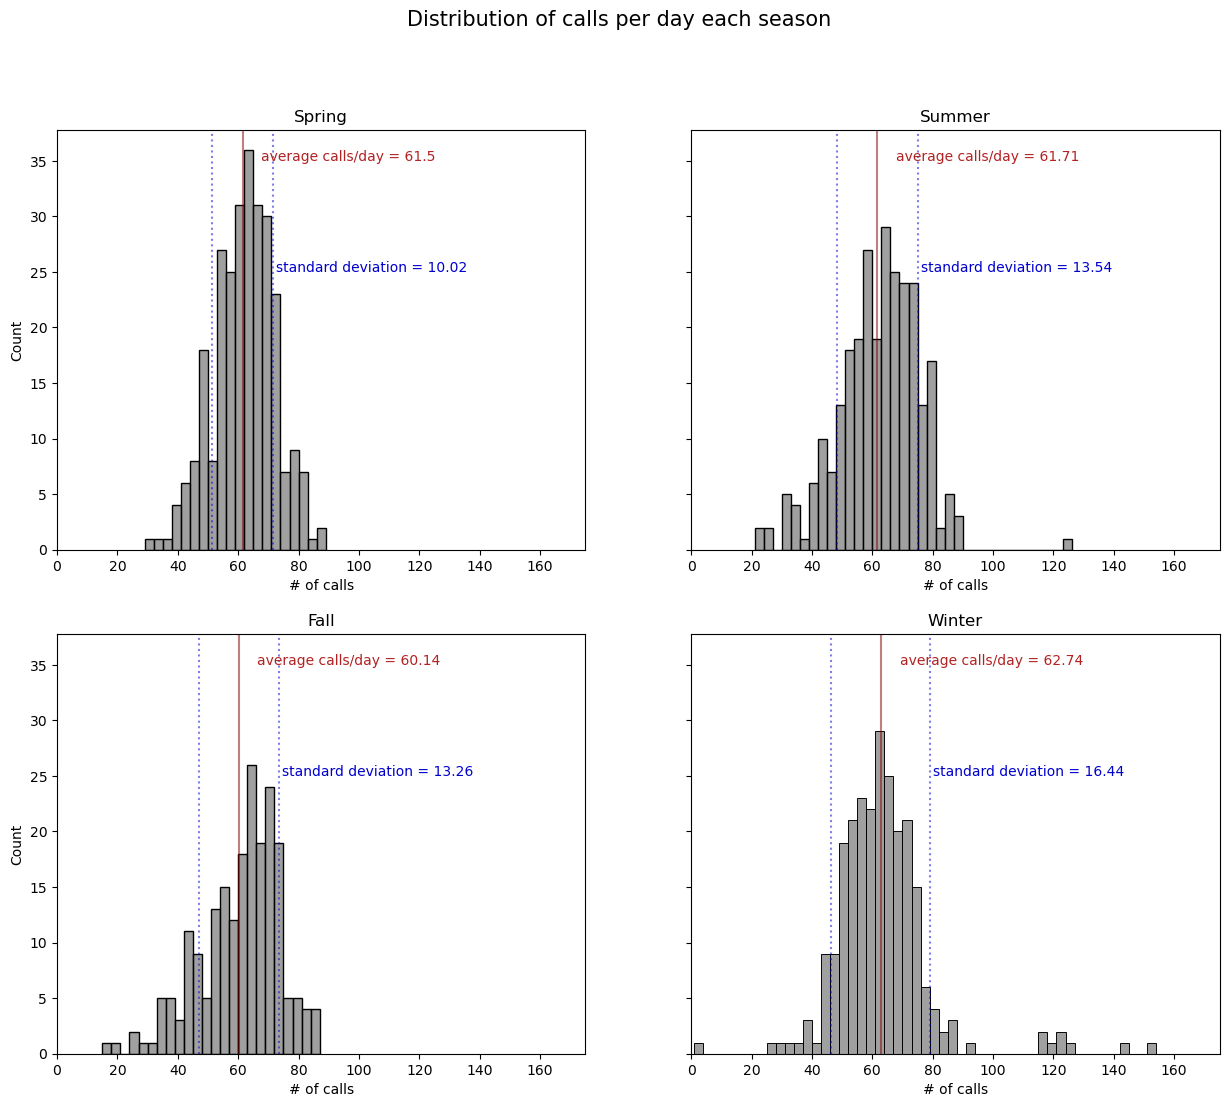

In [192]:
all_spring, all_summer, all_fall, all_winter = season_split(all_merge)
season_df = [all_spring, all_summer, all_fall, all_winter]
grouped_seasons=[]
for i in season_df:
    df = i.groupby(['date']).count().reset_index().rename(columns = {"time": "# of calls"})
    df['% of annual calls'] = (df['# of calls'] / np.sum(df['# of calls'])) * 100
    grouped_seasons.append(df)


seasons = ['Spring', 'Summer', 'Fall', 'Winter']
fig, ax = plt.subplots(2, 2, figsize = (15, 12), sharey=True)
fig.suptitle('Distribution of calls per day each season', fontsize = 15)

for i, j, k in zip(grouped_seasons, ax.flatten(), seasons):
    sns.histplot(i, x='# of calls', ax =j, bins = 40, binwidth=3, color = 'grey')
    mean = np.round(np.mean(i['# of calls']), 2)
    std = np.round(np.std(i['# of calls']), 2)
    j.axvline(mean, c='maroon', label = 'average calls/day', alpha = 0.5)
    j.text(mean * 1.1, 35, f'average calls/day = {mean}', c='firebrick')
    j.axvline(mean + std, color ='mediumblue', alpha = 0.5, linestyle =":")
    j.axvline(mean - std, color ='mediumblue', alpha = 0.5, linestyle =":")
    j.text(mean + std +1, 25, f'standard deviation = {std}', color ='mediumblue')
    # j.legend()
    j.set_xlim(0,175)
    j.set_title(k)

plt.show()

##### T tests

In [112]:
#Running T tests
from scipy.stats import t
p_vals = []
n = len(grouped_seasons[0]['# of calls'])
for i in grouped_seasons[1::]:
    diff = grouped_seasons[0]['# of calls'] - i['# of calls']
    mu = 0
    mean = np.mean(diff)
    # print(mean)
    sd = np.std(diff)
    T = (mean - mu) / (sd/np.sqrt(n))
    #two sided test
    p_value = 2*(1-t.cdf(np.abs(T), df=n-1))
    # print(f'pval ={p_value}')
    p_vals = np.append(p_vals, p_value)
print(f'The p-value of Spring(Mean) vs Summer(Mean) is: {p_vals[0]}')
print(f'The p-value of Spring(Mean) vs Fall(Mean) is: {p_vals[1]}')
print(f'The p-value of Spring(Mean) vs Winter(Mean) is: {p_vals[2]}')

The p-value of Spring(Mean) vs Summer(Mean) is: 0.7997702916414506
The p-value of Spring(Mean) vs Fall(Mean) is: 0.00010764334675994469
The p-value of Spring(Mean) vs Winter(Mean) is: 0.8532787262574908


In [191]:
#running T test all vs all
# p_vals = []
n = len(grouped_seasons[0]['# of calls'])

for i, k  in zip(grouped_seasons, range(4)):
    for j, l in zip(grouped_seasons, range(4)):
        diff = i['# of calls'] - j['# of calls']
        mu = 0
        mean = np.mean(diff)
        # print(mean)
        sd = np.std(diff)
        T = (mean - mu) / (sd/np.sqrt(n))
        #two sided test
        p_value = 2*(1-t.cdf(np.abs(T), df=n-1))
        # print(f'pval ={p_value}')
        # p_vals = np.append(p_vals, p_value)
        print(f'The p-value of {seasons[k]} vs {seasons[l]} is: {p_value}')

The p-value of Spring vs Spring is: nan
The p-value of Spring vs Summer is: 0.7997702916414506
The p-value of Spring vs Fall is: 0.00010764334675994469
The p-value of Spring vs Winter is: 0.8532787262574908
The p-value of Summer vs Spring is: 0.7997702916414506
The p-value of Summer vs Summer is: nan
The p-value of Summer vs Fall is: 2.827094114365991e-10
The p-value of Summer vs Winter is: 0.19034594700642482
The p-value of Fall vs Spring is: 0.00010764334675994469
The p-value of Fall vs Summer is: 2.827094114365991e-10
The p-value of Fall vs Fall is: nan
The p-value of Fall vs Winter is: 0.002150004482041945
The p-value of Winter vs Spring is: 0.8532787262574908
The p-value of Winter vs Summer is: 0.19034594700642482
The p-value of Winter vs Fall is: 0.002150004482041945
The p-value of Winter vs Winter is: nan


##### ks test

In [114]:
#running ks test
from scipy.stats import kstest
ks_p_vals = []
n = len(grouped_seasons[0]['# of calls'])
for i in grouped_seasons[1::]:
    ks_p_value = kstest(grouped_seasons[0]['# of calls'], i['# of calls'])[1]
    ks_p_vals = np.append(ks_p_vals, ks_p_value)
print(f'The p-value of Spring vs Summer is: {ks_p_vals[0]}')
print(f'The p-value of Spring vs Fall is: {ks_p_vals[1]}')
print(f'The p-value of Spring vs Winter is: {ks_p_vals[2]}')

The p-value of Spring vs Summer is: 0.048869118148969916
The p-value of Spring vs Fall is: 0.198230884453017
The p-value of Spring vs Winter is: 0.7334051466736482


In [115]:
#Running KS Test all vs all


for i, k  in zip(grouped_seasons, range(4)):
    for j, l in zip(grouped_seasons, range(4)):
        ks_p_value = kstest(i['# of calls'], j['# of calls'])[1]
        print(f'The p-value of {seasons[k]} vs {seasons[l]} is: {ks_p_value}')

The p-value of Spring vs Spring is: 1.0
The p-value of Spring vs Summer is: 0.048869118148969916
The p-value of Spring vs Fall is: 0.198230884453017
The p-value of Spring vs Winter is: 0.7334051466736482
The p-value of Summer vs Spring is: 0.048869118148969916
The p-value of Summer vs Summer is: 1.0
The p-value of Summer vs Fall is: 0.3822677660627637
The p-value of Summer vs Winter is: 0.3675236209758887
The p-value of Fall vs Spring is: 0.198230884453017
The p-value of Fall vs Summer is: 0.3822677660627637
The p-value of Fall vs Fall is: 1.0
The p-value of Fall vs Winter is: 0.2512520958796357
The p-value of Winter vs Spring is: 0.7334051466736482
The p-value of Winter vs Summer is: 0.3675236209758887
The p-value of Winter vs Fall is: 0.2512520958796357
The p-value of Winter vs Winter is: 1.0


In [116]:
day_night = (all_merge['time'] >= all_merge['sunrise']) & (all_merge['time'] <= all_merge['sunset'])
all_merge['day_night'] = day_night
day_night_calls = all_merge.groupby(['date', 'day_night', 'season']).count().reset_index().rename(columns = {'time':'# of calls'}).iloc[:,0:4]
day_night_reason =all_merge.groupby(['day_night', 'reason for dispatch']).count().reset_index().rename(columns = {'time':'# of calls'}).iloc[:,0:5]
week_reason = all_merge.groupby(['week', 'reason for dispatch']).count().reset_index().rename(columns = {'time':'# of calls'}).iloc[:,0:5]
day_night_week = all_merge.groupby(['week','day_night', 'reason for dispatch']).count().reset_index().rename(columns = {'time':'# of calls'}).iloc[:,0:5]

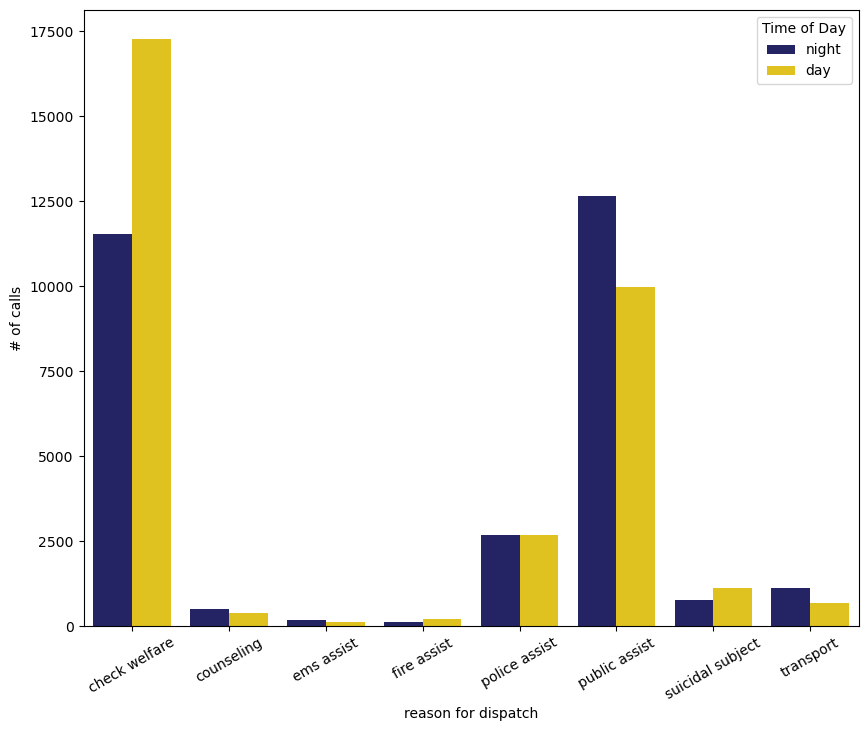

In [117]:
day_night_reason['day_night'] = day_night_reason['day_night'].replace([True, False], ['day', 'night'])

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(day_night_reason, x='reason for dispatch', y = '# of calls', hue = 'day_night', palette = ['midnightblue', 'gold'] )
ax.tick_params(axis='x', rotation=30)
ax.legend(title='Time of Day', loc='upper right')
plt.show()

##### Day vs Night distribution

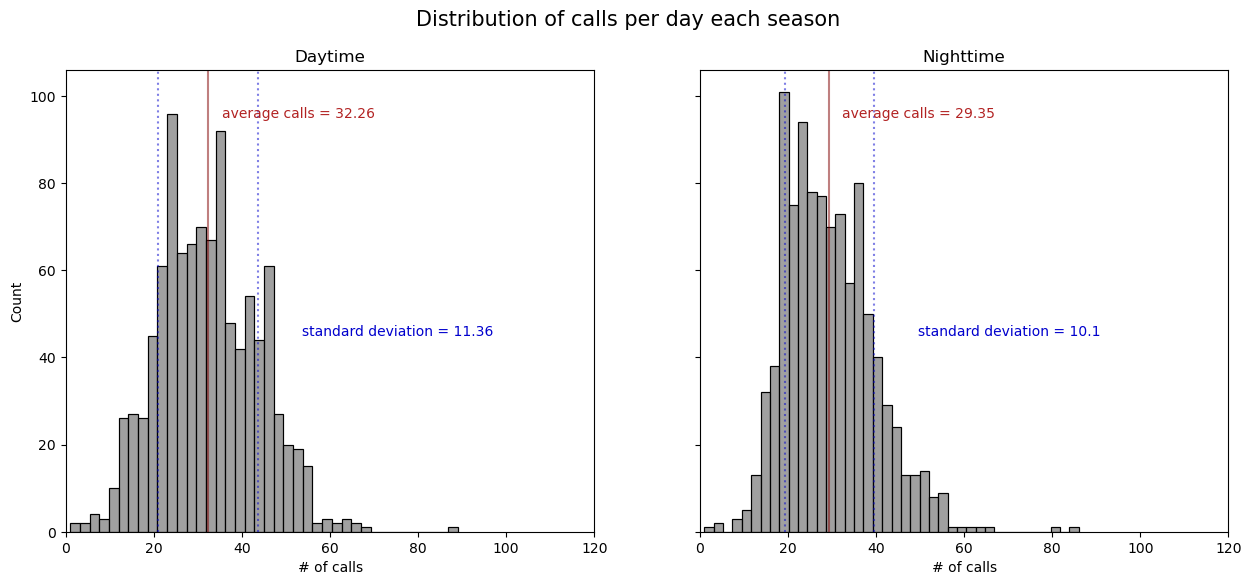

In [190]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharey=True)
fig.suptitle('Distribution of calls per day each season', fontsize = 15)
day_or_night = ['Daytime', 'Nighttime']
daytime = day_night_calls[day_night_calls['day_night'] == True]
nighttime = day_night_calls[day_night_calls['day_night'] == False] 
nighttime_season = season_split(nighttime)
daytime_season = season_split(daytime)


for i, j, k in zip([daytime, nighttime], ax.flatten(), day_or_night):
    sns.histplot(i, x='# of calls', ax =j, bins = 40, color = 'grey')
    mean = np.round(np.mean(i['# of calls']), 2)
    std = np.round(np.std(i['# of calls']), 2)
    j.axvline(mean, c='maroon', label = 'average calls/day', alpha = 0.5)
    j.text(mean * 1.1, 95, f'average calls = {mean}', c='firebrick')
    j.axvline(mean + std, color ='mediumblue', alpha = 0.5, linestyle =":")
    j.axvline(mean - std, color ='mediumblue', alpha = 0.5, linestyle =":")
    j.text(mean + std + 10, 45, f'standard deviation = {std}', color ='mediumblue')
    # j.legend()
    j.set_xlim(0,120)
    j.set_title(k)

plt.show()

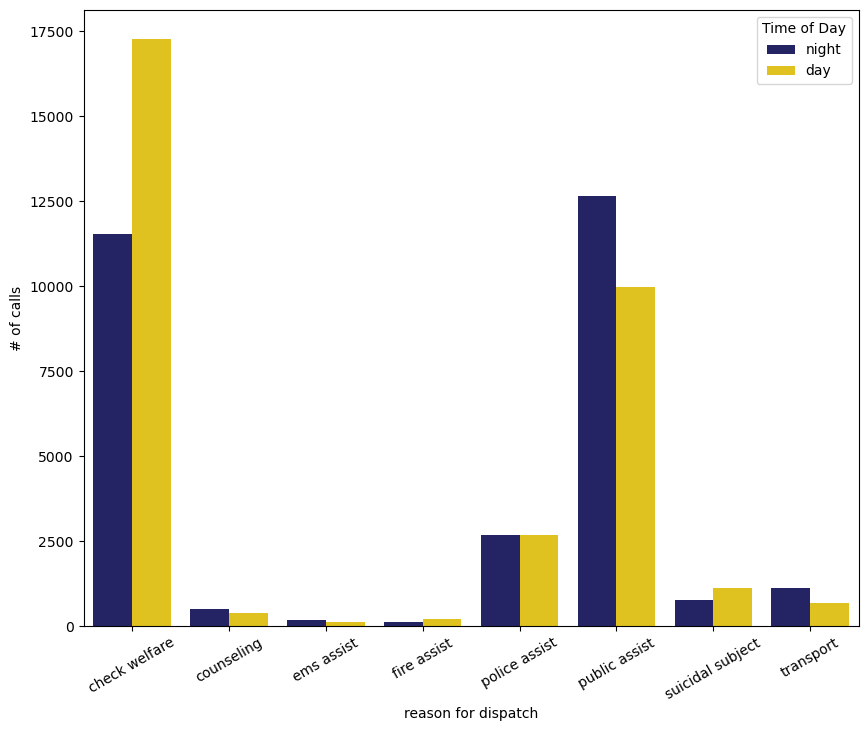

In [119]:
day_night_reason['day_night'] = day_night_reason['day_night'].replace([True, False], ['day', 'night'])

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(day_night_reason, x='reason for dispatch', y = '# of calls', hue = 'day_night', palette = ['midnightblue', 'gold'] )
ax.tick_params(axis='x', rotation=30)
ax.legend(title='Time of Day', loc='upper right')
plt.show()

##### Day vs Night by season

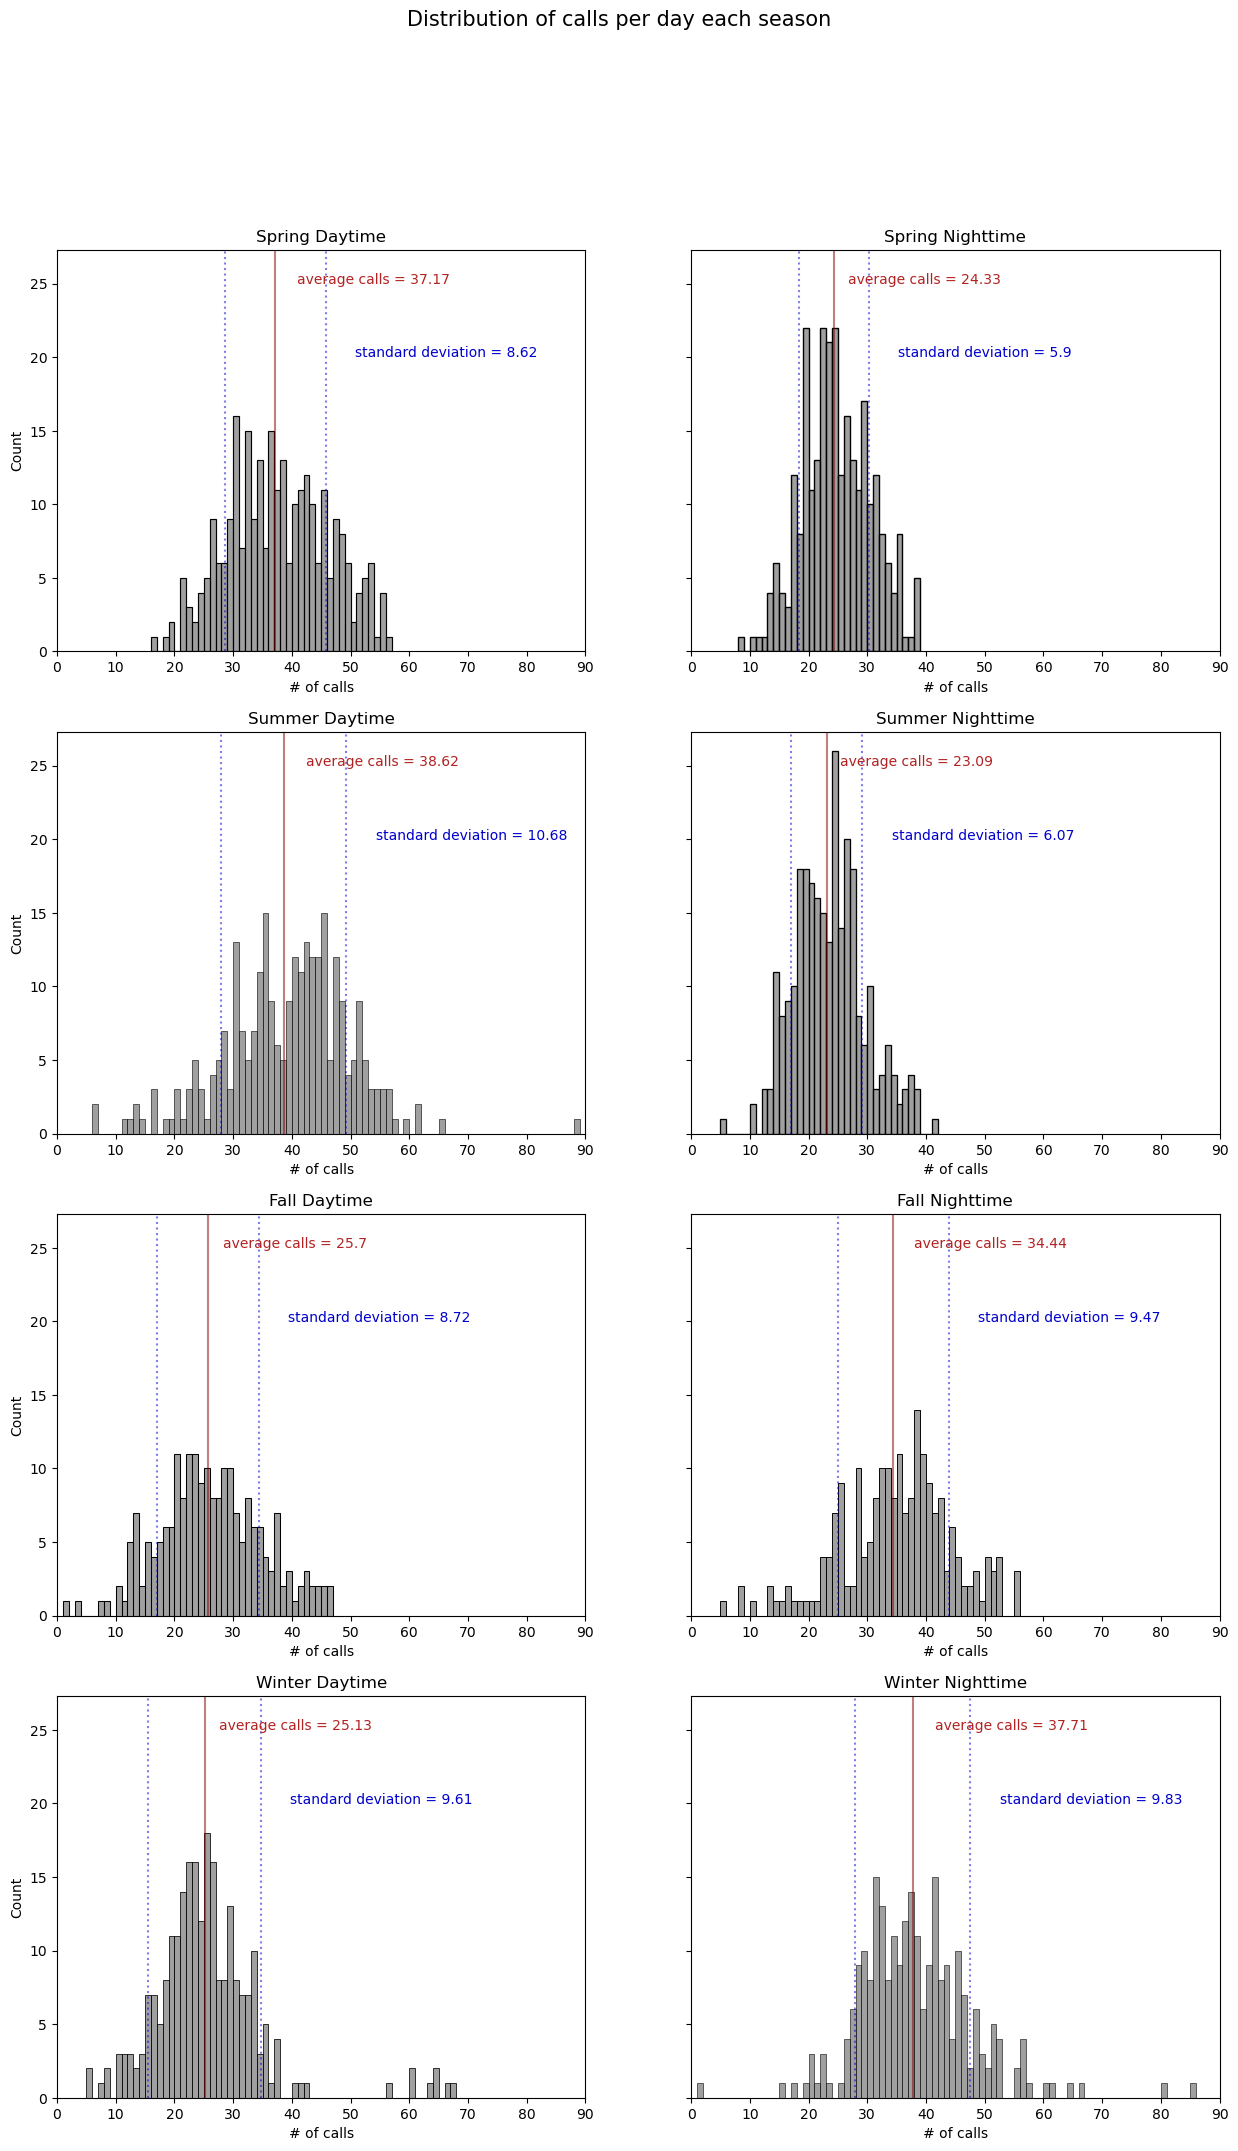

In [189]:
fig, ax = plt.subplots(4, 2, figsize = (15, 24), sharey=True)
fig.suptitle('Distribution of calls per day each season', fontsize = 15)
day_or_night = ['Daytime', 'Nighttime']
daytime = day_night_calls[day_night_calls['day_night'] == True]
nighttime = day_night_calls[day_night_calls['day_night'] == False] 
nighttime_season = season_split(nighttime)
daytime_season = season_split(daytime)
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
season_distributions = [daytime_season, nighttime_season]
# sns.histplot(season_distributions[1][3], x='# of calls', bins = 40, binwidth =1)

for i in range(0, 4):
    for j in range(0, 2):
        df = season_distributions[j][i]
        sns.histplot(df, x='# of calls', ax =ax[i][j], bins = 40, binwidth = 1, color = 'grey')
        mean = np.round(np.mean(df['# of calls']), 2)
        std = np.round(np.std(df['# of calls']), 2)
        ax[i][j].axvline(mean, c='maroon', label = 'average calls/day', alpha = 0.5)
        ax[i][j].text(mean * 1.1, 25, f'average calls = {mean}', c='firebrick')
        ax[i][j].axvline(mean + std, color ='mediumblue', alpha = 0.5, linestyle =":")
        ax[i][j].axvline(mean - std, color ='mediumblue', alpha = 0.5, linestyle =":")
        ax[i][j].text(mean + std + 5, 20, f'standard deviation = {std}', color ='mediumblue')
        # j.legend()
        ax[i][j].set_xlim(0,90)
        ax[i][j].set_title(seasons[i] + ' ' + day_or_night[j])

plt.show()

##### Eugene vs Springfield - Day vs night

In [211]:
eug_all_grouped = eug_all_day.groupby(['reason for dispatch', 'day_night']).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
eug_all_grouped['% of daily calls'] = (eug_all_grouped['# of calls'] / np.sum(eug_all_grouped['# of calls'])) * 100

spr_all_grouped = spr_all_day.groupby(['reason for dispatch', 'day_night']).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
spr_all_grouped['% of daily calls'] = (spr_all_grouped['# of calls'] / np.sum(spr_all_grouped['# of calls'])) * 100

season_names=['spring', 'summer', 'fall', 'winter']

spring_e_dn, summer_e_dn, fall_e_dn, winter_e_dn  = tuple([group_season_dn(eug_all_day, x) for x in season_names])
spring_s_dn, summer_s_dn, fall_s_dn, winter_s_dn  = tuple([group_season_dn(spr_all_day, x) for x in season_names])



##### Daytime season comparison - Eugene vs Springfield

In [122]:
spring_day_e = group_season(eug_day_data, 'spring')
summer_day_e = group_season(eug_day_data, 'summer')
fall_day_e = group_season(eug_day_data, 'fall')
winter_day_e = group_season(eug_day_data, 'winter')

spring_day_s = group_season(spr_day_data, 'spring')
summer_day_s = group_season(spr_day_data, 'summer')
fall_day_s = group_season(spr_day_data, 'fall')
winter_day_s = group_season(spr_day_data, 'winter')

##### Season and day/night

In [188]:
sp, su, fa, wi = season_split(sun_data)


season_df = [sp, su, fa, wi]
sunrise_means=[]
sunset_means = []

for i in season_df:
    # i['sunrise hour and min'] = i.loc[:,'sunrise'].apply(lambda x: x.hour + np.round(x.minute/60, 2))
    i['sunrise hour and min'] = np.array([(x.hour + np.round(x.minute/60, 2) ) for x in i.loc[:, 'sunrise'].copy()])
    # i['sunset hour and min'] = i.loc[:,'sunset'].apply(lambda x: x.hour + np.round(x.minute/60, 2))
    i['sunset hour and min'] = np.array([(x.hour + np.round(x.minute/60, 2) ) for x in i.loc[:, 'sunrise'].copy()])
    sunrise_means =np.append(sunrise_means, np.mean(i['sunrise hour and min']))
    sunset_means =np.append(sunset_means, np.mean(i['sunset hour and min']))

sp_sun_r, su_sun_r, fa_sun_r, wi_sun_r = tuple(sunrise_means)
sp_sun_s, su_sun_s, fa_sun_s, wi_sun_s = tuple(sunset_means)
sunrises = [sp_sun_r, su_sun_r, fa_sun_r, wi_sun_r]
sunsets = [sp_sun_s, su_sun_s, fa_sun_s, wi_sun_s]

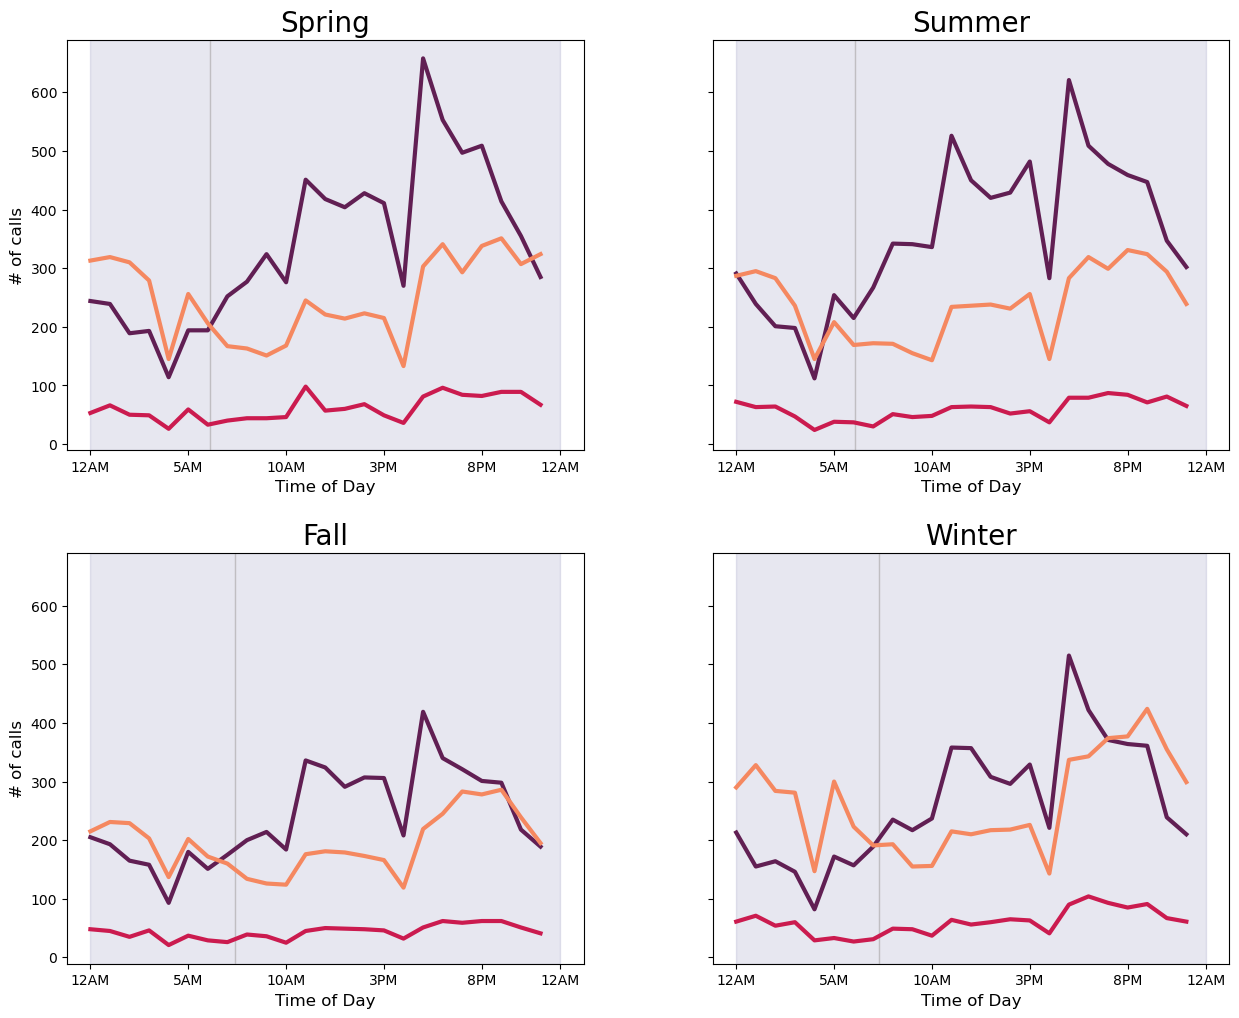

In [187]:

spring, summer, fall, winter = [group_season(sun_data, x) for x in ['spring', 'summer', 'fall', 'winter']]


seasons = [spring, summer, fall, winter]

fig, ax = plt.subplots(2, 2, figsize =(15, 12), sharey = True)
fig.subplots_adjust(hspace=0.25, wspace=0.25)
season_titles = ['Spring', 'Summer', 'Fall', 'Winter']

for i, j, k, l, m in zip(seasons, ax.flatten(), season_titles, sunrises, sunsets):
    sns.lineplot(top_3(i), x='hour', y= '# of calls', hue = 'reason for dispatch', palette = 'rocket', ax = j, linewidth = 3)
    j.set_title(f"{k}", fontsize = 20)
    j.set_xlabel('Time of Day', fontsize = 12)
    j.set_ylabel('# of calls', fontsize = 12)
    j.set_xticks(ticks=[0,5,10,15,20,24], labels=['12AM', '5AM', '10AM', '3PM', '8PM', '12AM'])
    j.legend([], [], frameon = False)
    j.axvspan(0, l, color='midnightblue', alpha=0.1)
    j.axvspan(l, m, color='gold', alpha=0.1)
    j.axvspan(m, 24, color='midnightblue', alpha=0.1)

plt.show()

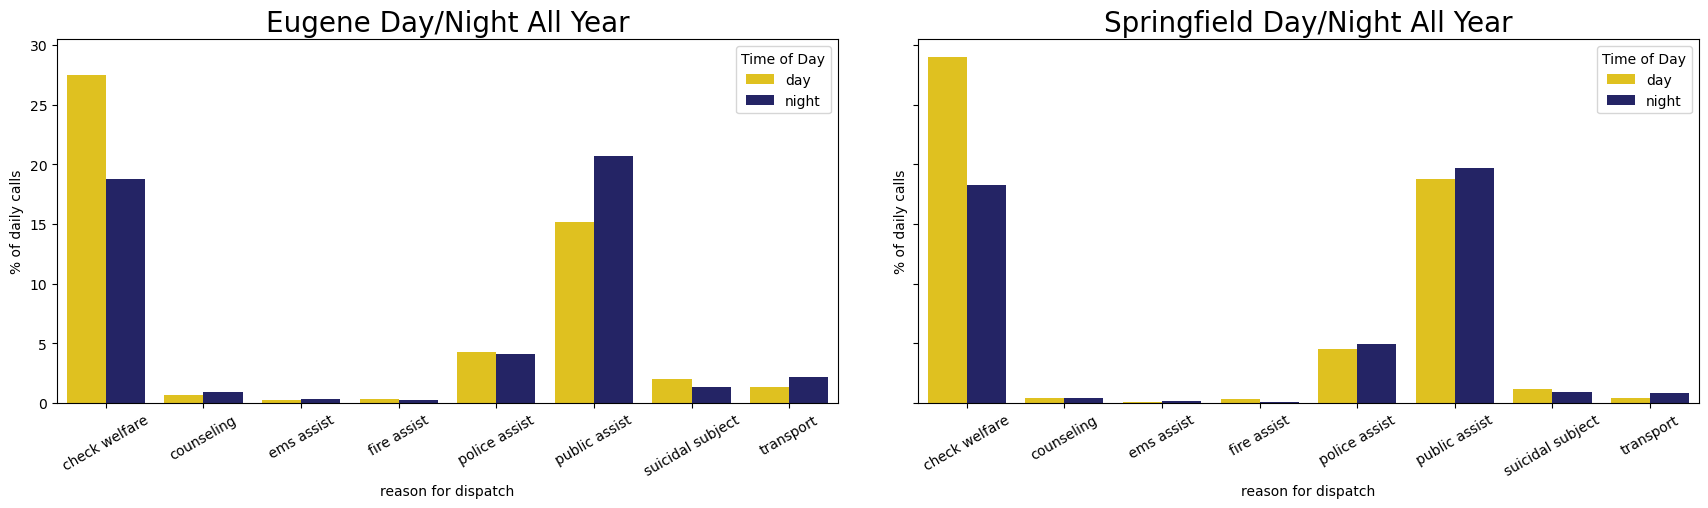

In [202]:
eug_all_grouped = eug_all_day.groupby(['reason for dispatch', 'day_night']).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
eug_all_grouped['% of daily calls'] = (eug_all_grouped['# of calls'] / np.sum(eug_all_grouped['# of calls'])) * 100

spr_all_grouped = spr_all_day.groupby(['reason for dispatch', 'day_night']).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
spr_all_grouped['% of daily calls'] = (spr_all_grouped['# of calls'] / np.sum(spr_all_grouped['# of calls'])) * 100

season_names=['spring', 'summer', 'fall', 'winter']

spring_e_dn, summer_e_dn, fall_e_dn, winter_e_dn  = tuple([group_season_dn(eug_all_day, x) for x in season_names])
spring_s_dn, summer_s_dn, fall_s_dn, winter_s_dn  = tuple([group_season_dn(spr_all_day, x) for x in season_names])


fig, ax = plt.subplots(1,2, figsize=(18, 6), sharey=True)


sns.barplot(data=eug_all_grouped, x='reason for dispatch', y ='% of daily calls', hue = 'day_night', palette = ('gold','midnightblue'), ax=ax[0])
ax[0].set_title('Eugene Day/Night All Year', fontsize = 20)
ax[0].tick_params(axis='x', rotation=30)
ax[0].legend(title='Time of Day')


sns.barplot(data=spr_all_grouped, x='reason for dispatch', y ='% of daily calls', hue = 'day_night', palette = ('gold','midnightblue'), ax=ax[1])
ax[1].set_title('Springfield Day/Night All Year', fontsize = 20)
ax[1].tick_params(axis='x', rotation=30)
ax[1].legend(title='Time of Day')





fig.tight_layout(pad=4.0)
plt.show()

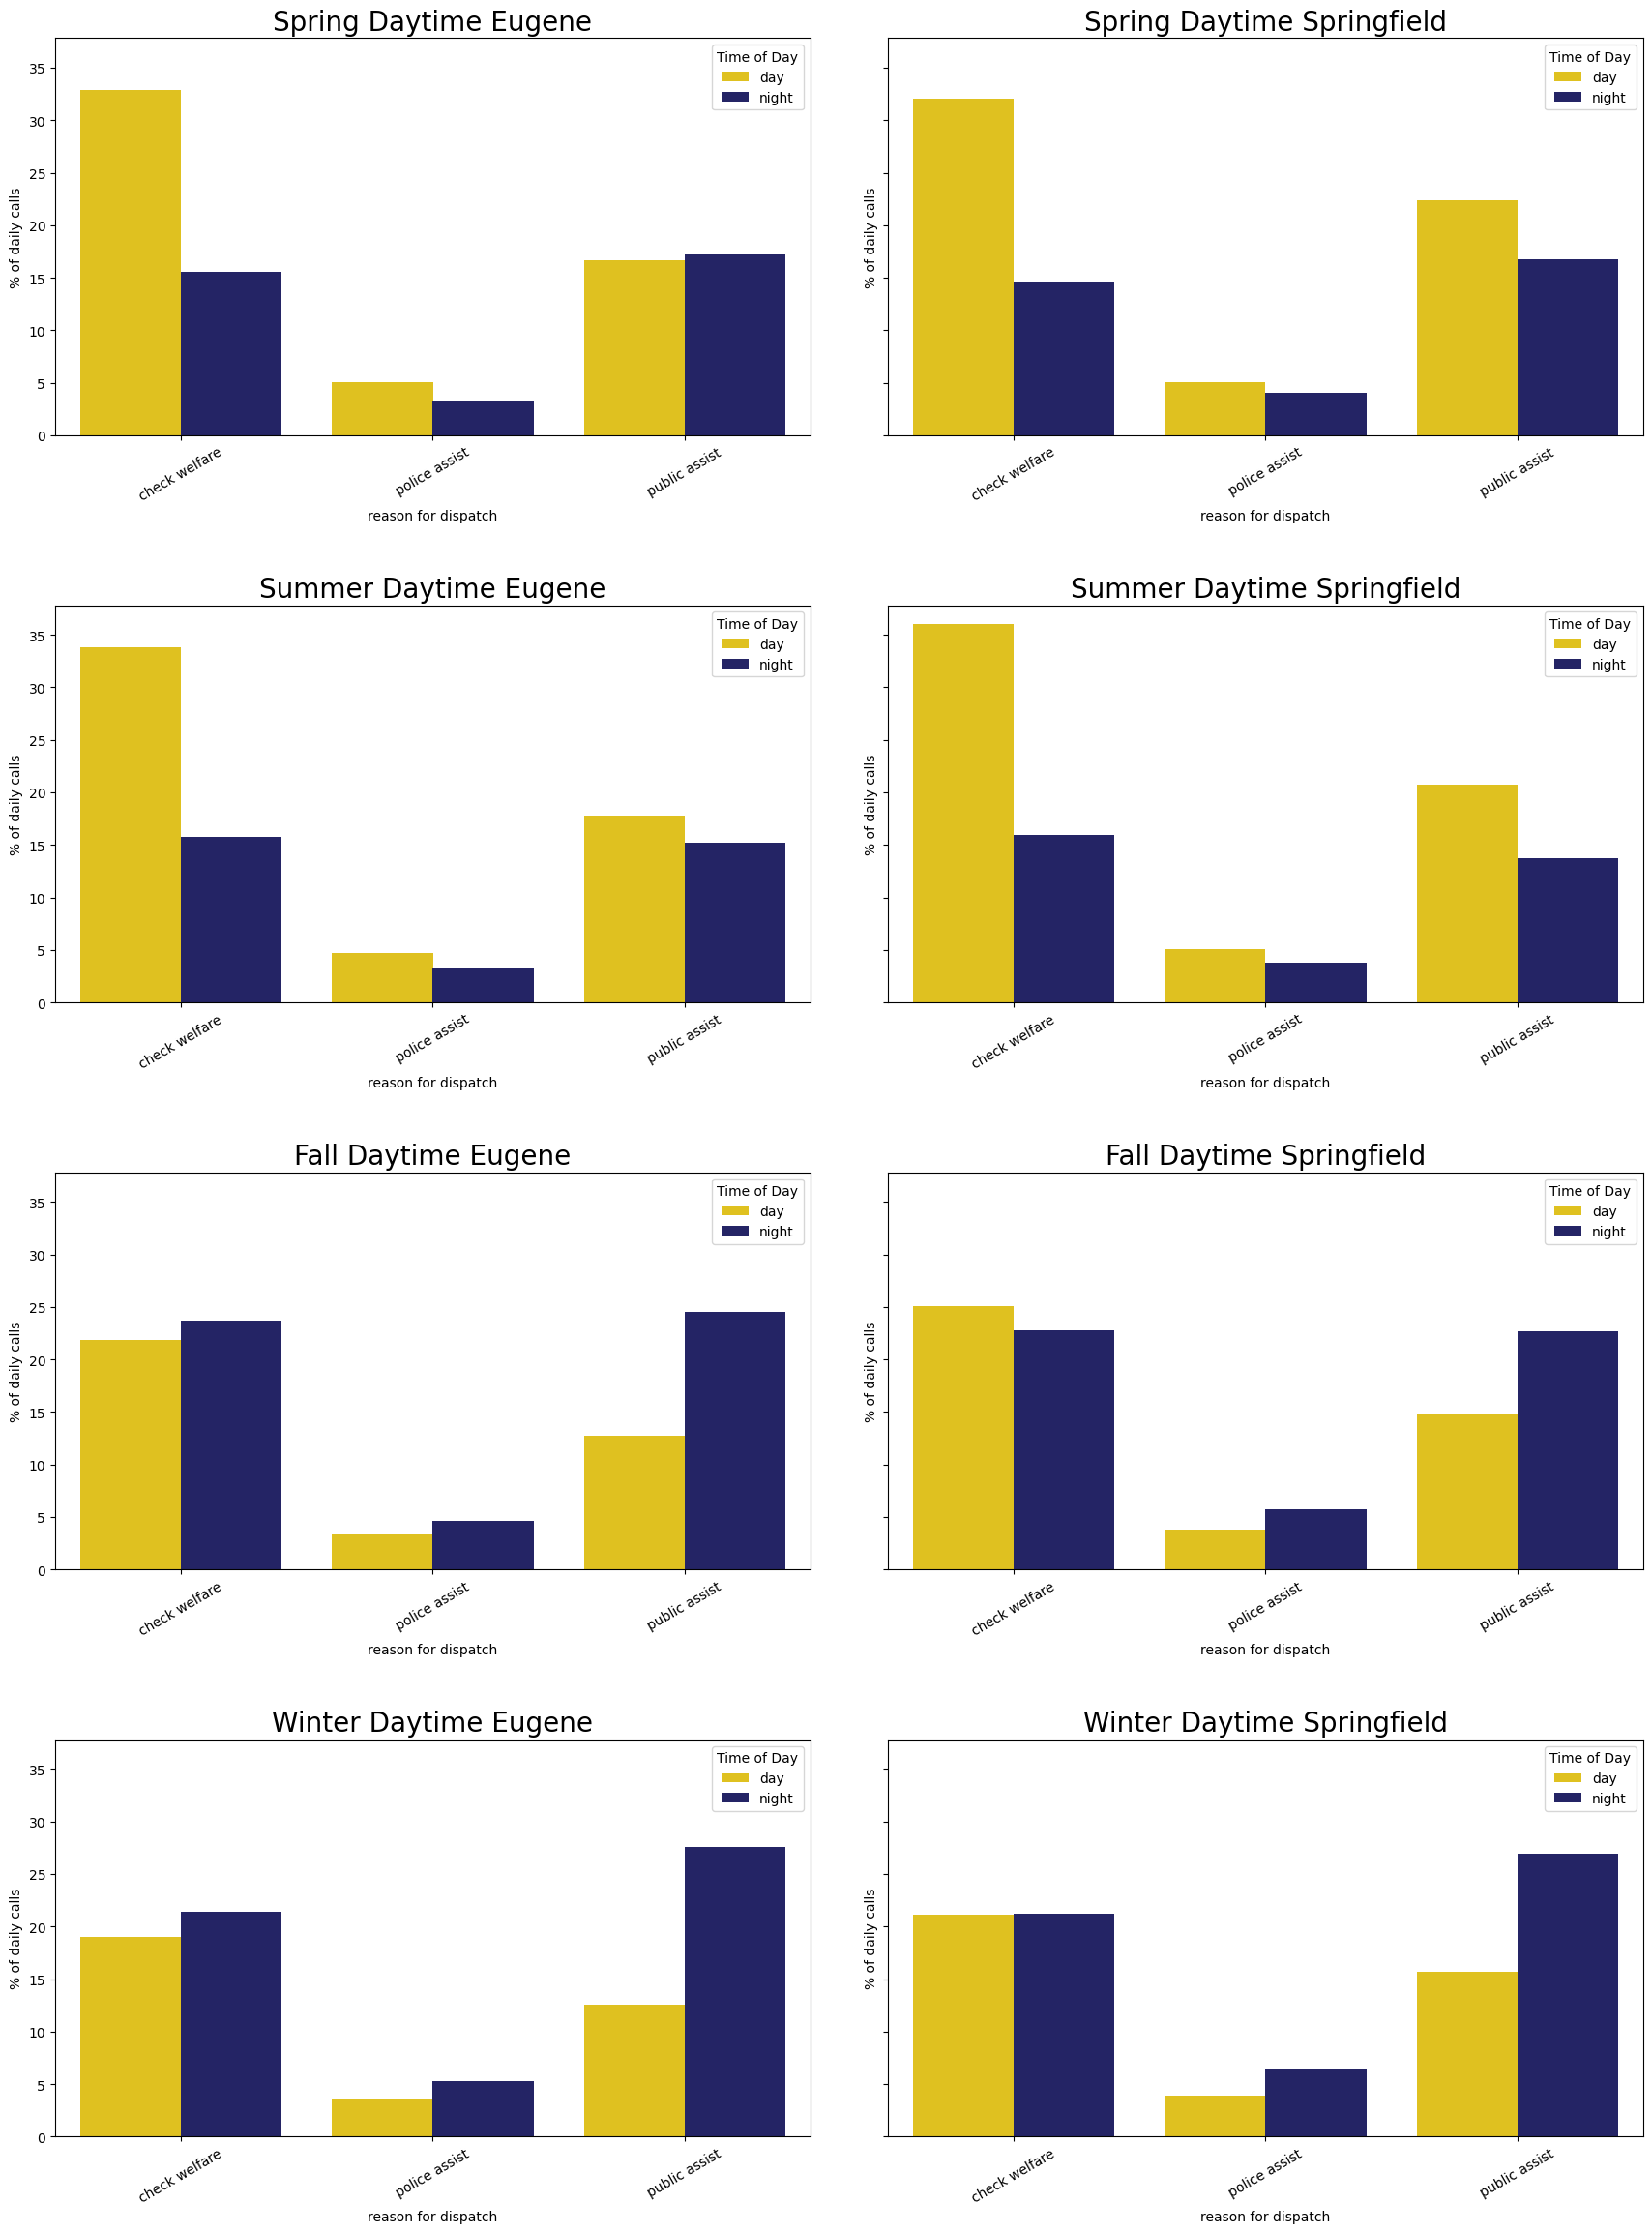

In [210]:
fig, ax = plt.subplots(4,2, figsize=(18,24), sharey=True)

season_name=['spring',' spring' 'summer', 'summer', 'fall', 'fall', 'winter', 'winter']
season_dfs = [spring_e_dn, spring_s_dn, summer_e_dn, summer_s_dn, fall_e_dn, fall_s_dn, winter_e_dn, winter_s_dn]
city = ['Eugene', 'Springfield']

# for i in ['Eugene', 'Springfield']:
for i,j,k in zip(season_dfs, ax.flatten(), range(8)) :
    sns.barplot(data=top_3(i), x='reason for dispatch', y ='% of daily calls', hue = 'day_night', palette = ('gold','midnightblue'), ax=j)
    j.tick_params(axis='x', rotation=30)
    j.legend(title='Time of Day')
    # if (k % 2) == 0:
    #     j.set_title(f'Eugene Day/Night {season_name[k]}', fontsize = 20)
    # else:
    #     j.set_title(f'Springfield Day/Night {season_name[k]}', fontsize = 20)
    j.set_title(f'{s_names[k]} Daytime {city[k%2]}', fontsize = 20)
fig.tight_layout(pad=4.0)
plt.show()

##### Season - day eugene vs springfield top 3

In [129]:
spring_day_e = group_season(eug_day_data, 'spring')
summer_day_e = group_season(eug_day_data, 'summer')
fall_day_e = group_season(eug_day_data, 'fall')
winter_day_e = group_season(eug_day_data, 'winter')

spring_day_s = group_season(spr_day_data, 'spring')
summer_day_s = group_season(spr_day_data, 'summer')
fall_day_s = group_season(spr_day_data, 'fall')
winter_day_s = group_season(spr_day_data, 'winter')

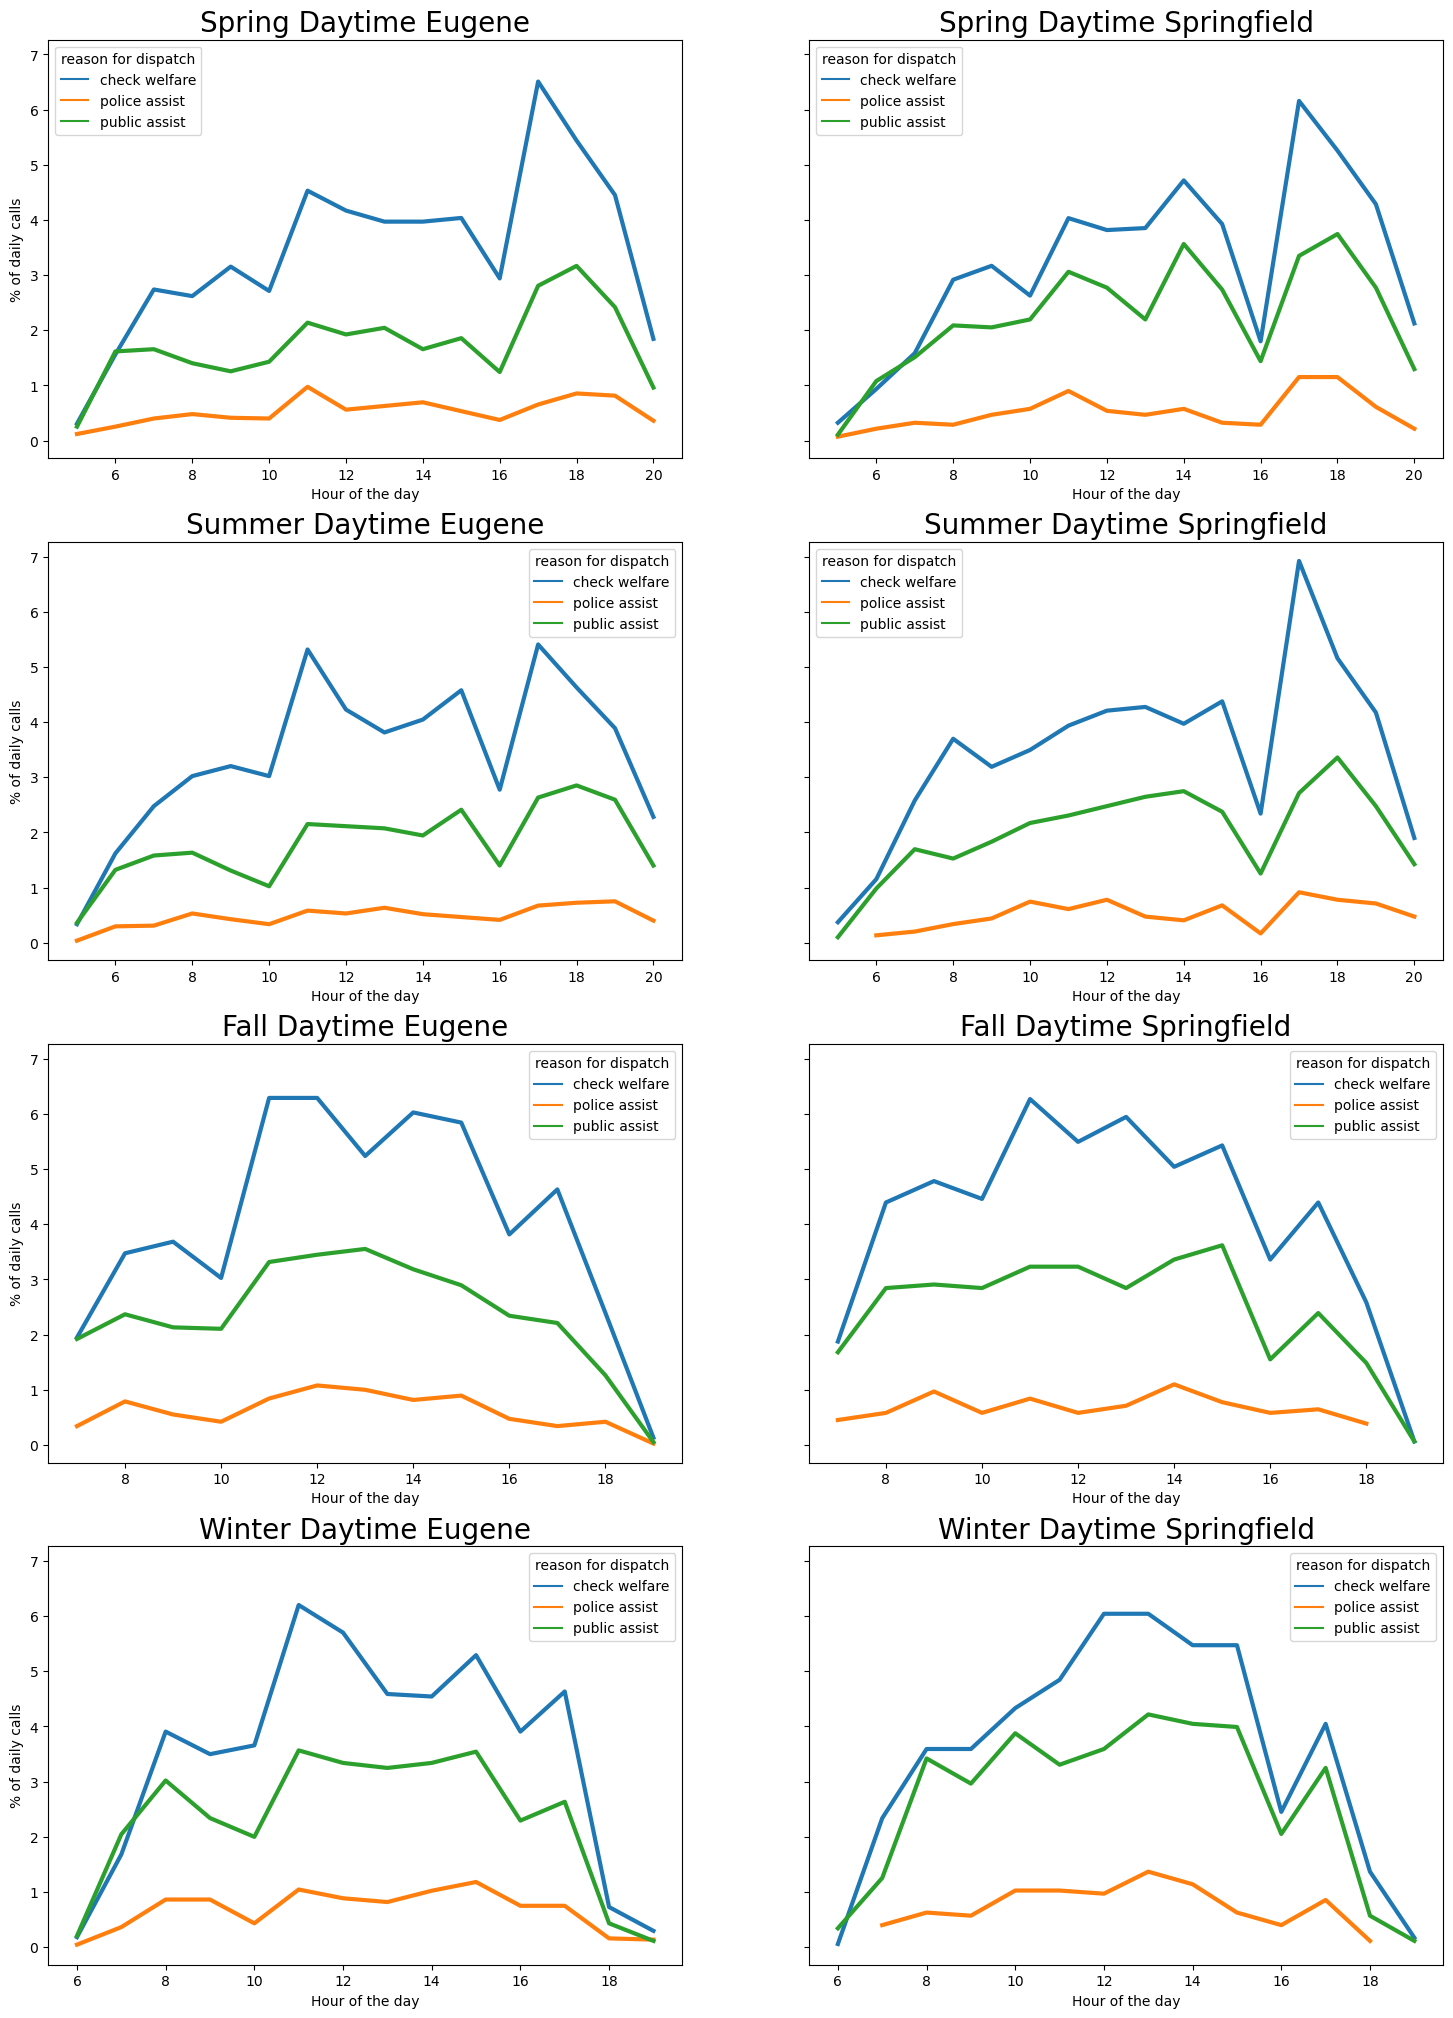

In [208]:
fig, ax = plt.subplots(4, 2, figsize=(18, 25), sharey=True)

s_df = [spring_day_e, spring_day_s, summer_day_e, summer_day_s, fall_day_e, fall_day_s, winter_day_e, winter_day_s]
s_names = ['Spring','Spring', 'Summer','Summer', 'Fall','Fall', 'Winter','Winter']
city = ['Eugene', 'Springfield']

for i,j,k in zip(s_df, ax.flatten(), range(8)) :
    sns.lineplot(top_3(i), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = j ,linewidth = 3)
    j.tick_params(axis='x')
    j.set_xlabel('Hour of the day')
    j.set_title(f'{s_names[k]} Daytime {city[k%2]}', fontsize = 20)

plt.show()

##### Season all day - eugene vs springfield top 3

In [131]:
spring_e = group_season(eug_all_day, 'spring')
summer_e = group_season(eug_all_day, 'summer')
fall_e = group_season(eug_all_day, 'fall')
winter_e = group_season(eug_all_day, 'winter')
spring_s = group_season(spr_all_day, 'spring')
summer_s = group_season(spr_all_day, 'summer')
fall_s = group_season(spr_all_day, 'fall')
winter_s = group_season(spr_all_day, 'winter')

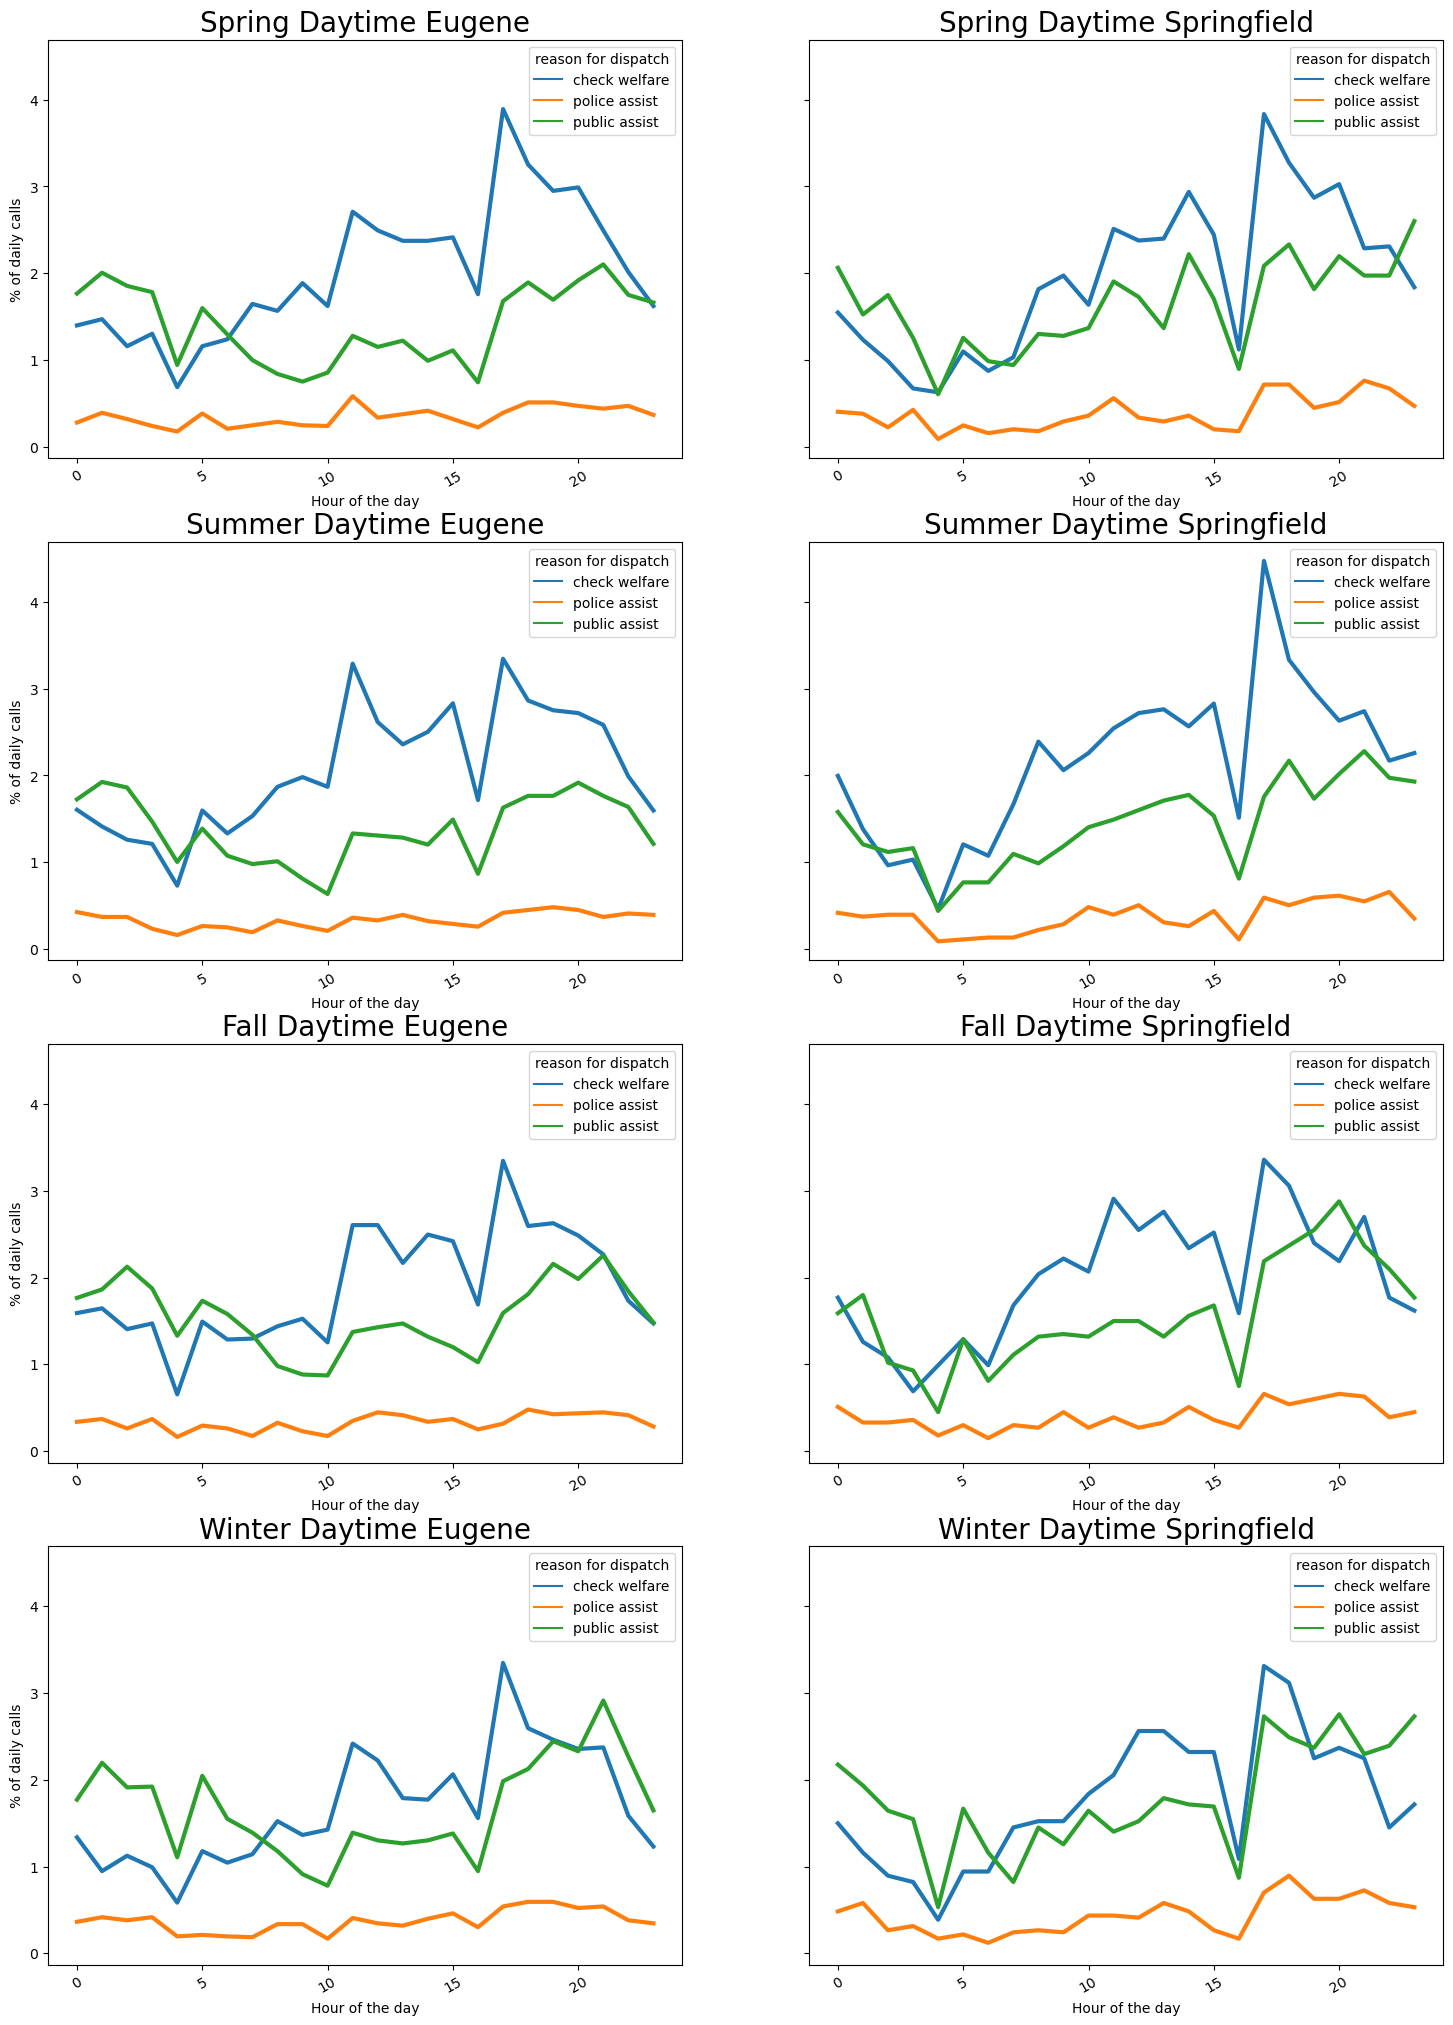

In [212]:
season_frames = [spring_e, spring_s, summer_e, summer_s, fall_e, fall_s, winter_e, winter_s]
s_names = ['Spring','Spring', 'Summer','Summer', 'Fall','Fall', 'Winter','Winter']
city = ['Eugene', 'Springfield']

fig, ax = plt.subplots(4, 2, figsize=(18, 25), sharey=True)

for i,j,k in zip(season_frames, ax.flatten(), range(8)) :
    sns.lineplot(top_3(i), x='hour', y= '% of daily calls', hue = 'reason for dispatch', ax = j ,linewidth = 3)
    j.tick_params(axis='x', rotation=30)
    j.set_xlabel('Hour of the day')
    j.set_title(f'{s_names[k]} Daytime {city[k%2]}', fontsize = 20)

plt.show()

#### Season distributions

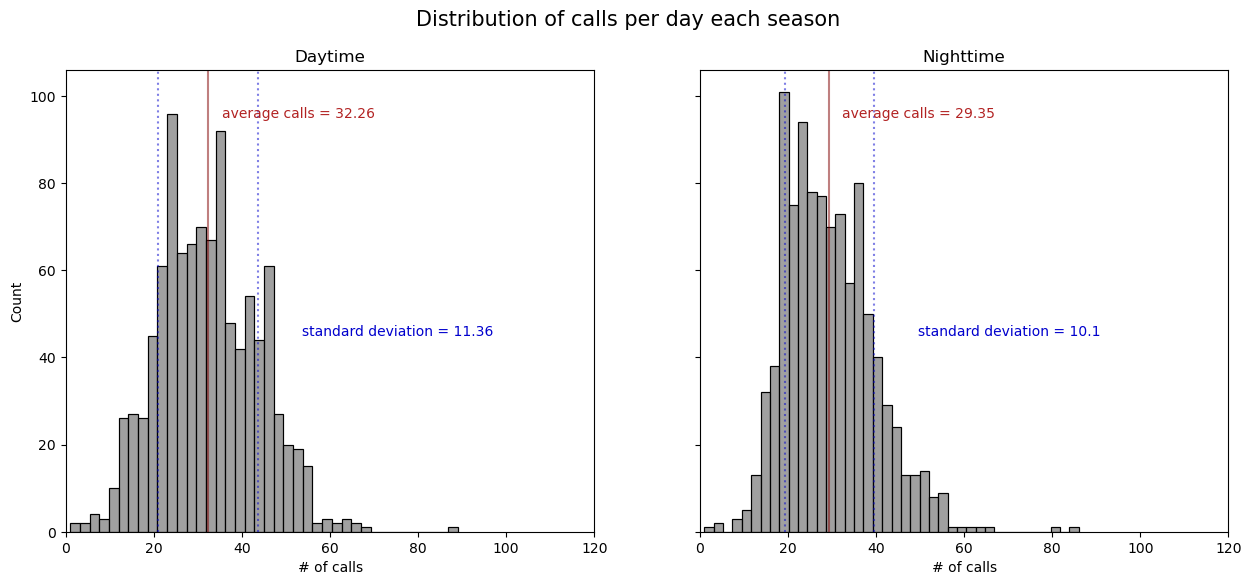

In [213]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharey=True)
fig.suptitle('Distribution of calls per day each season', fontsize = 15)
day_or_night = ['Daytime', 'Nighttime']
daytime = day_night_calls[day_night_calls['day_night'] == True]
nighttime = day_night_calls[day_night_calls['day_night'] == False] 
nighttime_season = season_split(nighttime)
daytime_season = season_split(daytime)


for i, j, k in zip([daytime, nighttime], ax.flatten(), day_or_night):
    sns.histplot(i, x='# of calls', ax =j, bins = 40, color = 'grey')
    mean = np.round(np.mean(i['# of calls']), 2)
    std = np.round(np.std(i['# of calls']), 2)
    j.axvline(mean, c='maroon', label = 'average calls/day', alpha = 0.5)
    j.text(mean * 1.1, 95, f'average calls = {mean}', c='firebrick')
    j.axvline(mean + std, color ='mediumblue', alpha = 0.5, linestyle =":")
    j.axvline(mean - std, color ='mediumblue', alpha = 0.5, linestyle =":")
    j.text(mean + std + 10, 45, f'standard deviation = {std}', color ='mediumblue')
    # j.legend()
    j.set_xlim(0,120)
    j.set_title(k)

plt.show()

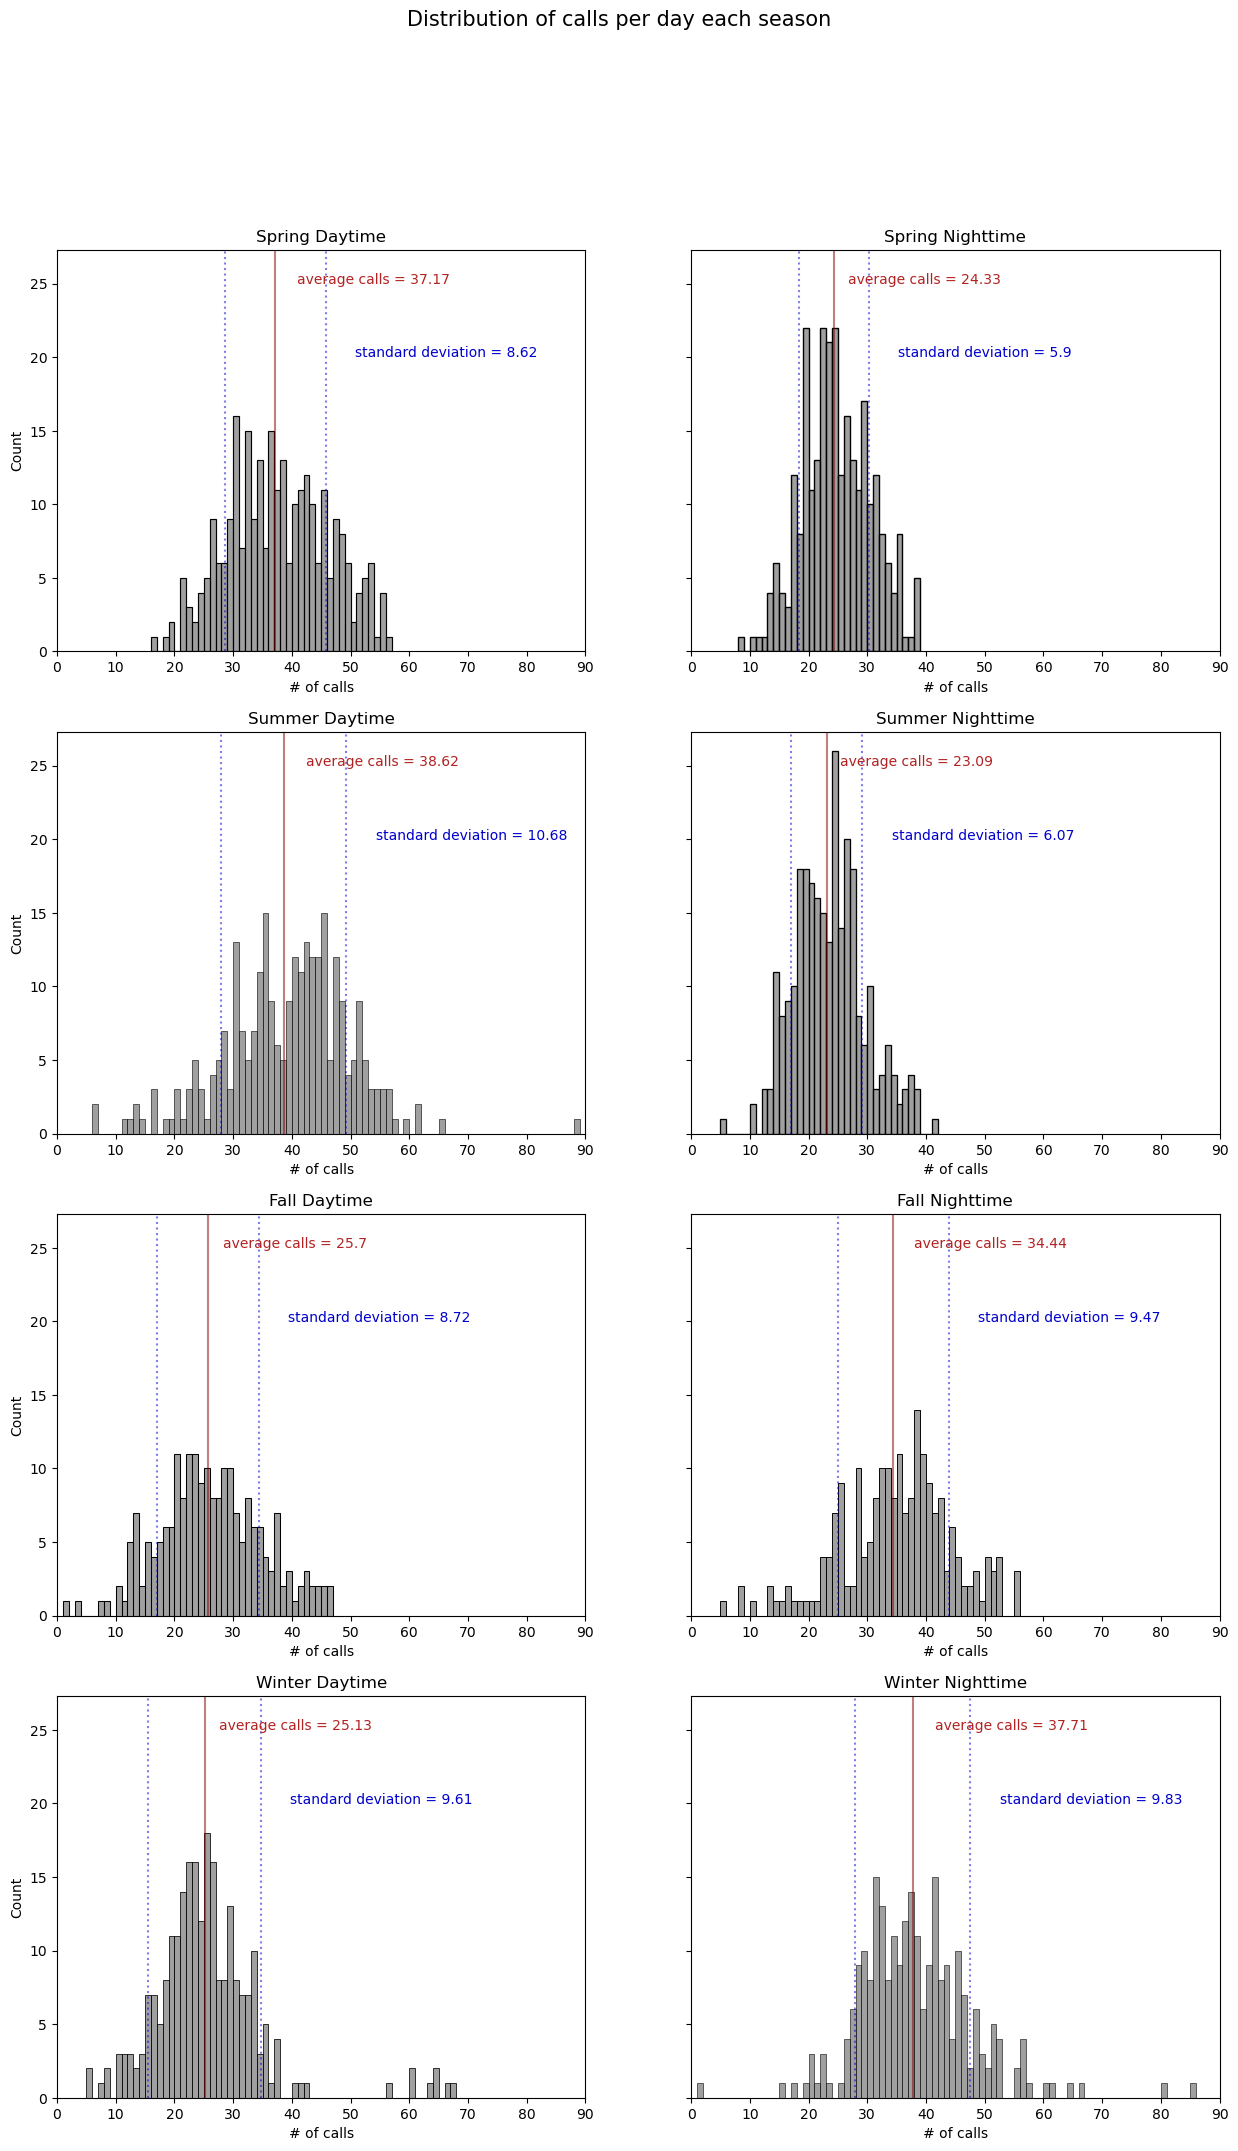

In [214]:
fig, ax = plt.subplots(4, 2, figsize = (15, 24), sharey=True)
fig.suptitle('Distribution of calls per day each season', fontsize = 15)
day_or_night = ['Daytime', 'Nighttime']
daytime = day_night_calls[day_night_calls['day_night'] == True]
nighttime = day_night_calls[day_night_calls['day_night'] == False] 
nighttime_season = season_split(nighttime)
daytime_season = season_split(daytime)
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
season_distributions = [daytime_season, nighttime_season]
# sns.histplot(season_distributions[1][3], x='# of calls', bins = 40, binwidth =1)

for i in range(0, 4):
    for j in range(0, 2):
        df = season_distributions[j][i]
        sns.histplot(df, x='# of calls', ax =ax[i][j], bins = 40, binwidth = 1, color = 'grey')
        mean = np.round(np.mean(df['# of calls']), 2)
        std = np.round(np.std(df['# of calls']), 2)
        ax[i][j].axvline(mean, c='maroon', label = 'average calls/day', alpha = 0.5)
        ax[i][j].text(mean * 1.1, 25, f'average calls = {mean}', c='firebrick')
        ax[i][j].axvline(mean + std, color ='mediumblue', alpha = 0.5, linestyle =":")
        ax[i][j].axvline(mean - std, color ='mediumblue', alpha = 0.5, linestyle =":")
        ax[i][j].text(mean + std + 5, 20, f'standard deviation = {std}', color ='mediumblue')
        # j.legend()
        ax[i][j].set_xlim(0,90)
        ax[i][j].set_title(seasons[i] + ' ' + day_or_night[j])

plt.show()

##### All day - monthly 

In [135]:
def group_month(df):
    new_df = df.groupby(['reason for dispatch', 'hour']).count().reset_index().iloc[:, 0:3].rename(columns = {'date':'# of calls'})
    new_df['% of daily calls'] = (new_df['# of calls'] / np.sum(new_df['# of calls'])) * 100
    return new_df

In [136]:
sun_data['month'] = month_col(sun_data)
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec = month_split(sun_data)
months = [jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec]

In [215]:
s_rise_means=[]
s_set_means = []

for i in months:
    i['sunrise hour and min'] = i['sunrise'].apply(lambda x: x.hour + np.round(x.minute/60, 2))
    i['sunset hour and min'] = i['sunset'].apply(lambda x: x.hour + np.round(x.minute/60, 2))
    s_rise_means =np.append(s_rise_means, np.mean(i['sunrise hour and min']))
    s_set_means =np.append(s_set_means, np.mean(i['sunset hour and min']))

rise_1, rise_2, rise_3, rise_4, rise_5, rise_6, rise_7, rise_8, rise_9, rise_10, rise_11, rise_12 = tuple(s_rise_means)
set_1, set_2, set_3, set_4, set_5, set_6, set_7, set_8, set_9, set_10, set_11, set_12 = tuple(s_set_means)
rises = [rise_1, rise_2, rise_3, rise_4, rise_5, rise_6, rise_7, rise_8, rise_9, rise_10, rise_11, rise_12]
sets = [set_1, set_2, set_3, set_4, set_5, set_6, set_7, set_8, set_9, set_10, set_11, set_12]
months_grouped = [group_month(x) for x in months]
months_grouped[0]

,reason for dispatch,hour,# of calls,% of daily calls
0,check welfare,0.0,63,1.298166
1,check welfare,1.0,37,0.762415
2,check welfare,2.0,57,1.174531
3,check welfare,3.0,41,0.844838
4,check welfare,4.0,32,0.659386
...,...,...,...,...
162,transport,19.0,7,0.144241
163,transport,20.0,9,0.185452
164,transport,21.0,7,0.144241
165,transport,22.0,6,0.123635


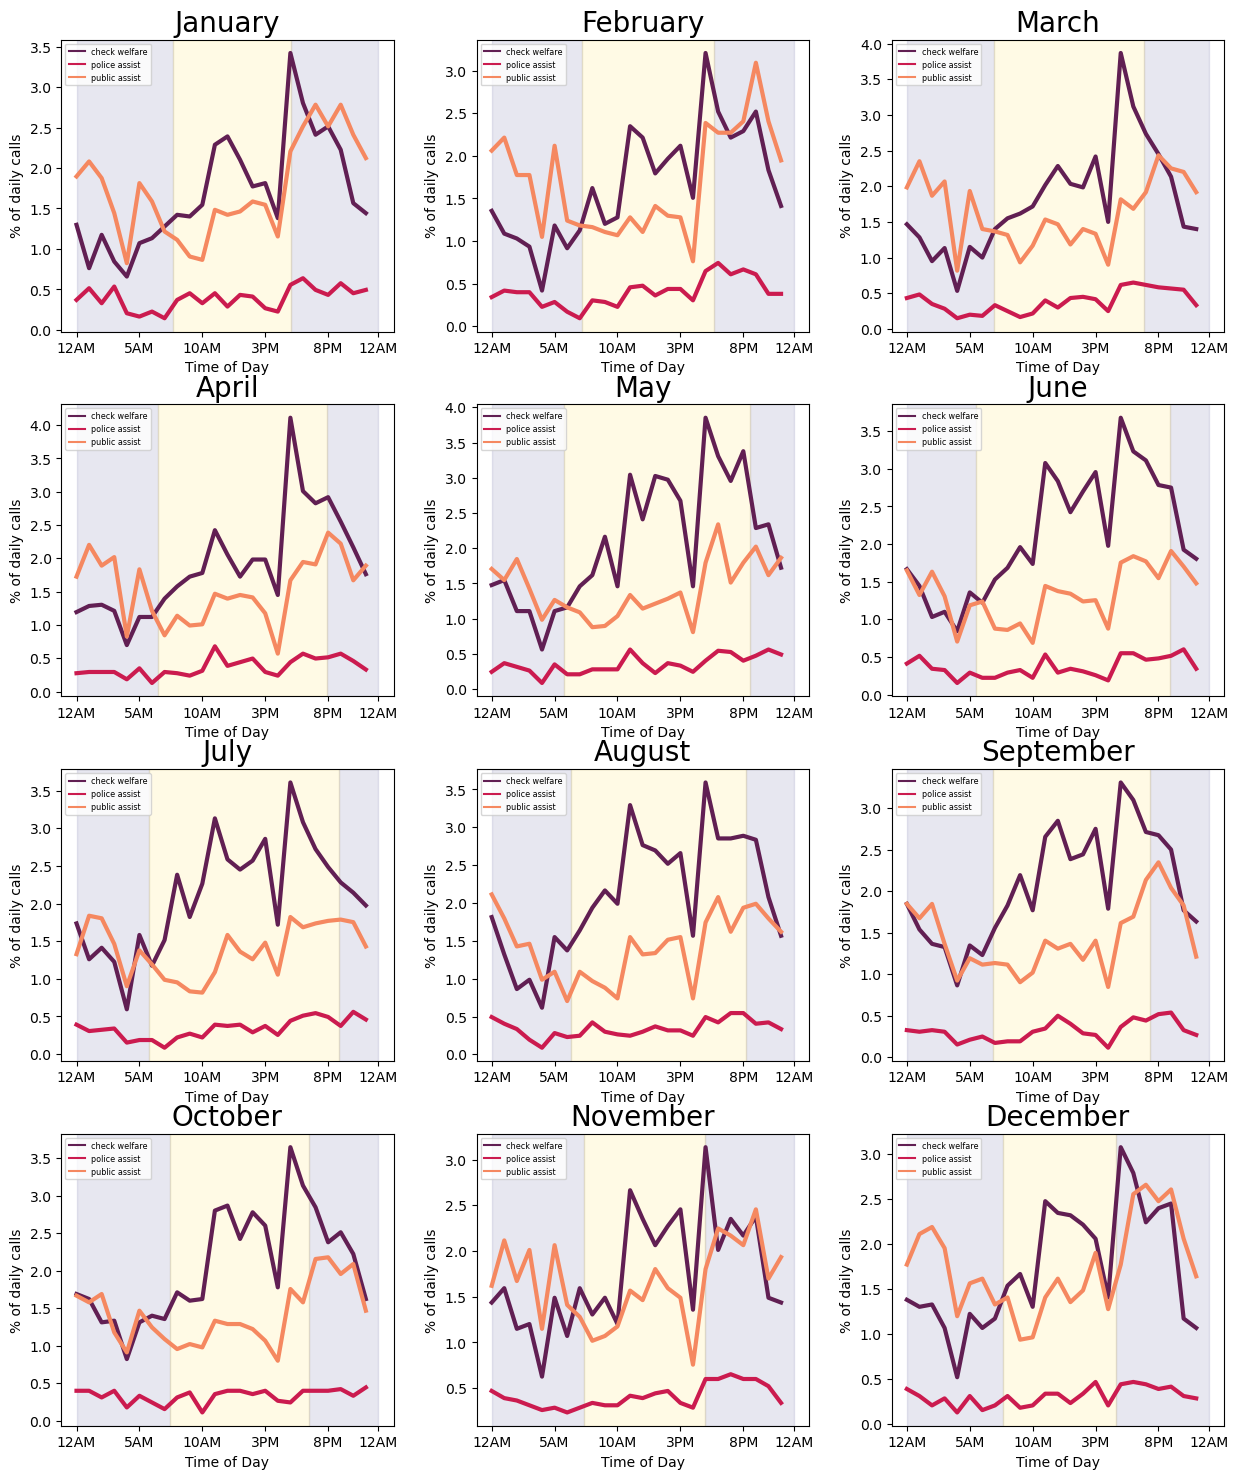

In [216]:
fig, ax = plt.subplots(4, 3, figsize =(15, 18))
fig.subplots_adjust(hspace=0.25, wspace=0.25)


for i, j, k, l, m in zip(months_grouped, ax.flatten(), month_labels, rises, sets):
    sns.lineplot(top_3(i), x='hour', y= '% of daily calls', hue = 'reason for dispatch', palette = 'rocket', ax = j, linewidth = 3)
    j.set_title(f"{k}", fontsize = 20)
    j.set_xlabel('Time of Day')
    j.set_xticks(ticks=[0,5,10,15,20,24], labels=['12AM', '5AM', '10AM', '3PM', '8PM', '12AM'])
    j.legend(loc=2, fontsize ='xx-small')
    j.axvspan(0, l, color='midnightblue', alpha=0.1)
    j.axvspan(l, m, color='gold', alpha=0.1)
    j.axvspan(m, 24, color='midnightblue', alpha=0.1)

plt.show()

#### Seasons top 3 

##### AQI calls

In [142]:
from pandas.api.types import CategoricalDtype

aqi_order = ['good', 'moderate', 'unhealthy for sensitive grouops', 'unhealthy', 'very unhealthy', 'hazardous']
category_order = CategoricalDtype(aqi_order, ordered=True)

aqi_data["aqi_index"] = aqi_index(aqi_data)
aqi_data["aqi_index"]= aqi_data["aqi_index"].astype(category_order)
aqi_grouped = aqi_data.groupby(['overall aqi']).count().reset_index().rename(columns = {'date':'# of calls'})
aqi_grouped

,overall aqi,# of calls,time,city,reason for dispatch,hour and min,hour,season,aqi_index
0,12,135,135,135,135,135,135,135,135
1,13,364,364,364,364,364,364,364,364
2,14,408,408,408,408,408,408,408,408
3,15,587,587,587,587,587,587,587,587
4,16,295,295,295,295,295,295,295,295
...,...,...,...,...,...,...,...,...,...
140,351,72,72,72,72,72,72,72,72
141,359,47,47,47,47,47,47,47,47
142,362,56,56,56,56,56,56,56,56
143,380,56,56,56,56,56,56,56,56


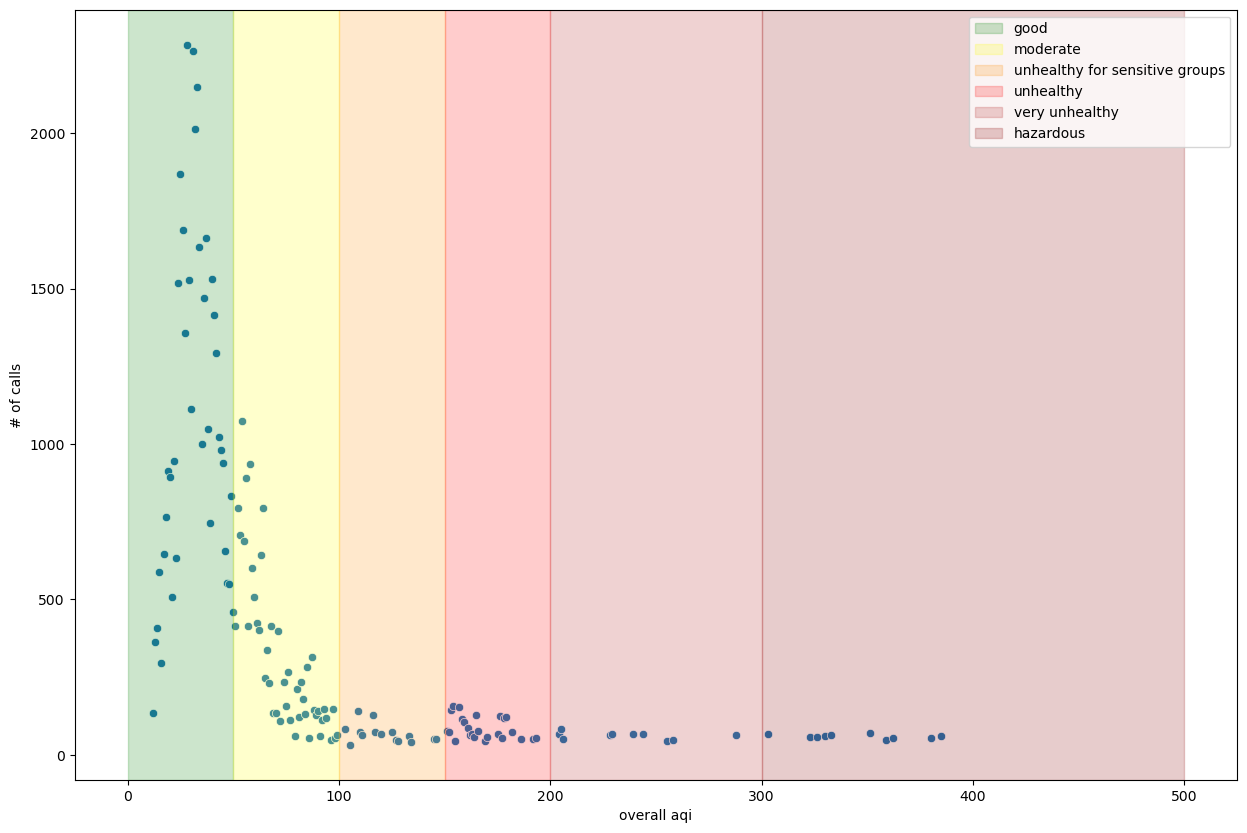

In [143]:
aqi_ranges = [0,50,100, 150, 200, 300, 500]
aqi_categories = ['good', 'moderate', 'unhealthy for sensitive groups', 'unhealthy', 'very unhealthy', 'hazardous']
aqi_colors = ['green', 'yellow', 'darkorange', 'red', 'firebrick', 'darkred']


fig, ax = plt.subplots (figsize = (15,10))
sns.scatterplot( aqi_grouped, x='overall aqi', y = '# of calls')
for i, k, c in zip(range(1,7), aqi_categories, aqi_colors):
        ax.axvspan(aqi_ranges[i-1], aqi_ranges[i], color = c, label = k , alpha=0.2)  

ax.legend()

plt.show()

In [154]:
aqi_order = ['good', 'moderate', 'unhealthy for sensitive groups', 'unhealthy', 'very unhealthy', 'hazardous']
category_order = CategoricalDtype(aqi_order, ordered=True)

aqi_data["aqi_index"] = aqi_index(aqi_data)
aqi_data["aqi_index"]= aqi_data["aqi_index"].astype(category_order)
aqi_data['ones'] = np.ones(len(aqi_data))
aqi_grouped = aqi_data.groupby(['date','overall aqi']).count().reset_index() #.rename(columns = {'date':'# of calls'})
aqi_grouped['index'] = aqi_index(aqi_grouped)


aqi_clean = aqi.iloc[:, 0:2]
aqi_clean['Date'] = pd.to_datetime(aqi_clean['Date'])
aqi_clean = aqi_clean.rename(columns={'Date':'date', 'Overall AQI Value': 'overall aqi'})

aqi_data =pd.merge(c_data, aqi_clean, on='date', how = 'left')
aqi_data = aqi_data.dropna(subset = 'reason for dispatch')
eug_aqi = aqi_data[aqi_data['city'] == 'eugene'].reset_index(drop=True)
spr_aqi = aqi_data[aqi_data['city'] == 'springfield'].reset_index(drop=True)


eug_aqi['aqi_index'] = aqi_index(eug_aqi)
spr_aqi['aqi_index'] = aqi_index(spr_aqi)
eug_aqi['week'] = week_col(eug_aqi)
spr_aqi['week'] = week_col(spr_aqi)

aqi_data = aqi_data.reset_index(drop=True)
aqi_data['aqi_index'] = aqi_index(aqi_data)
# aqi_order = ['good', 'moderate', 'unhealthy for sensitive grouops', 'unhealthy', 'very unhealthy', 'hazardous']
# category_order = CategoricalDtype(aqi_order, ordered=True)
# eug_aqi["aqi_index"]= eug_aqi["aqi_index"].astype(category_order)
# spr_aqi["aqi_index"]= spr_aqi["aqi_index"].astype(category_order)

# aqi_data.to_csv('aqi_data.csv')

# aqi_data[(aqi_data['season'] != 'winter') & (aqi_data['season'] != 'spring') & (aqi_data['season'] != 'summer') & (aqi_data['season'] != 'fall')]



In [152]:
aqi_data

,date,time,city,reason for dispatch,hour and min,hour,season,overall aqi,aqi_index
0,2022-12-07,01:28:00,eugene,counseling,1.47,1.0,fall,69,moderate
1,2022-11-10,13:12:00,eugene,police assist,13.20,13.0,fall,85,moderate
2,2021-01-20,17:25:01,eugene,public assist,17.42,17.0,winter,92,moderate
3,2021-01-20,21:34:01,eugene,public assist,21.57,21.0,winter,92,moderate
4,2021-01-20,22:10:30,eugene,public assist,22.17,22.0,winter,92,moderate
...,...,...,...,...,...,...,...,...,...
61946,2023-10-15,20:46:04,eugene,check welfare,20.77,20.0,fall,59,moderate
61947,2023-10-15,20:55:00,eugene,check welfare,20.92,20.0,fall,59,moderate
61948,2023-10-15,21:28:35,springfield,check welfare,21.47,21.0,fall,59,moderate
61949,2023-10-15,22:11:25,springfield,check welfare,22.18,22.0,fall,59,moderate


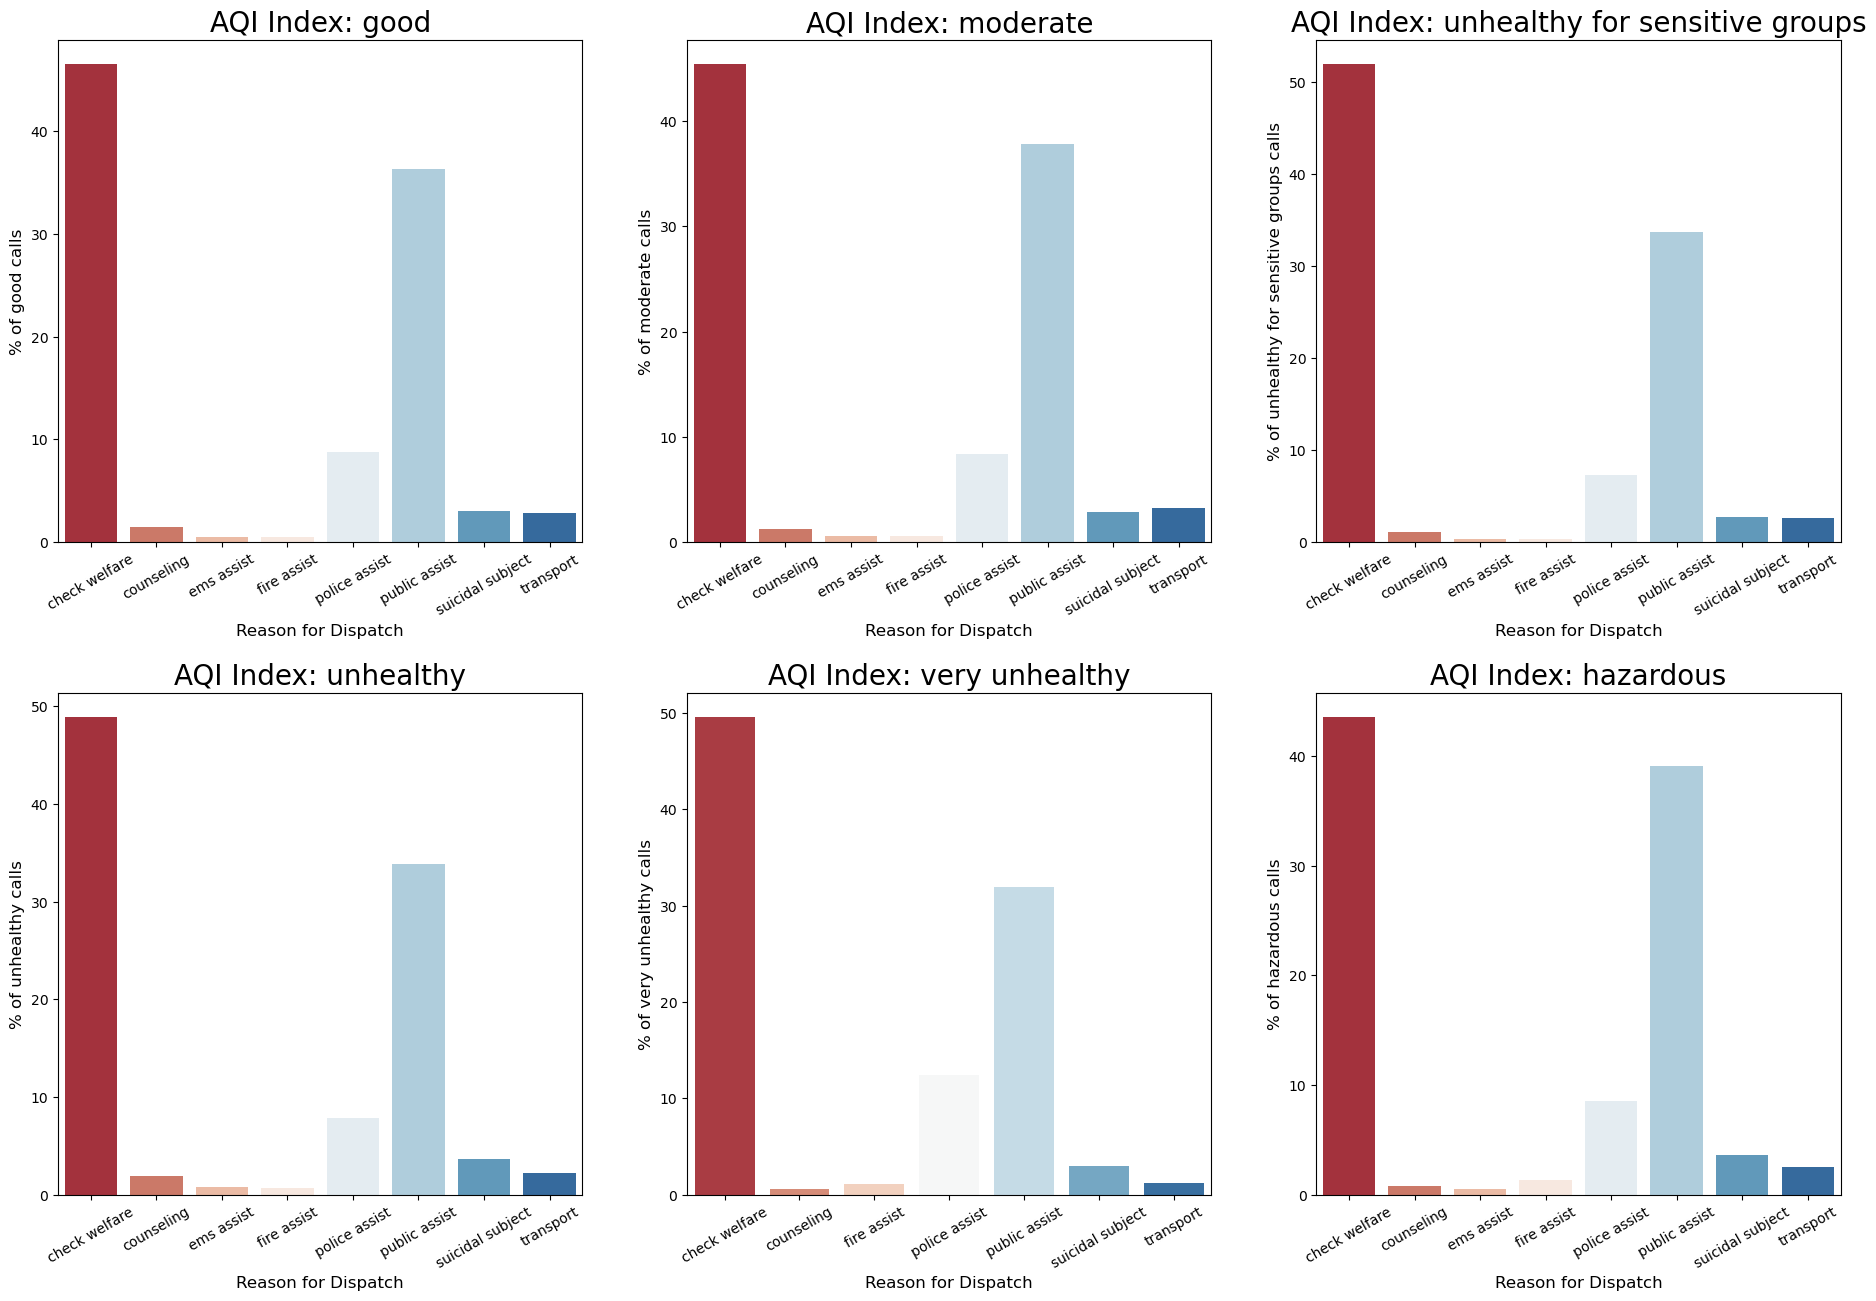

In [155]:
aqi_cat = aqi_data.groupby(['aqi_index', 'reason for dispatch']).count().reset_index()
aqi_cat.head(40)
aqi_cat_group = aqi_cat.groupby(['reason for dispatch', 'aqi_index']).mean().reset_index().rename(columns = {'date':'# of calls'})
aqi_cat_group

fig,ax = plt.subplots(2, 3, figsize= (23, 15))
plt.subplots_adjust(hspace = 0.3)

for i, j in zip(aqi_order, ax.flatten()):
    df = aqi_cat_group[aqi_cat_group['aqi_index'] == i].copy()
    df['percent'] = (df['# of calls'] / sum(df['# of calls'])) * 100
    sns.barplot( df, x='reason for dispatch', y = 'percent', ax = j, errorbar = None, palette='RdBu')
    j.set_ylabel(f'% of {i} calls', fontsize = 12)
    j.set_xlabel('Reason for Dispatch', fontsize = 12)
    j.set_title(f'AQI Index: {i}', fontsize = 20)
    j.tick_params(axis='x', rotation=30)

plt.show()

In [166]:
aqi_grouped.drop(columns = ['date'])


,overall aqi,time,city,reason for dispatch,hour and min,hour,season,aqi_index,ones,index
0,31,1,1,1,1,1,1,1,1,good
1,52,29,29,29,29,29,29,29,29,moderate
2,33,32,32,32,32,32,32,32,32,good
3,45,39,39,39,39,39,39,39,39,good
4,35,67,67,67,67,67,67,67,67,good
...,...,...,...,...,...,...,...,...,...,...
1001,14,30,30,30,30,30,30,30,30,good
1002,27,53,53,53,53,53,53,53,53,good
1003,40,54,54,54,54,54,54,54,54,good
1004,44,20,20,20,20,20,20,20,20,good


In [170]:
final_aqi = aqi_grouped.drop(columns = ['date']).groupby(['overall aqi']).mean(numeric_only=True).reset_index().rename(columns = {'time':'# of calls'})
final_aqi

,overall aqi,# of calls,city,reason for dispatch,hour and min,hour,season,aqi_index,ones
0,12,67.500000,67.500000,67.500000,67.500000,67.500000,67.500000,67.500000,67.500000
1,13,60.666667,60.666667,60.666667,60.666667,60.666667,60.666667,60.666667,60.666667
2,14,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
3,15,58.700000,58.700000,58.700000,58.700000,58.700000,58.700000,58.700000,58.700000
4,16,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
...,...,...,...,...,...,...,...,...,...
140,351,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
141,359,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
142,362,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
143,380,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000


In [172]:
from scipy import stats
final_aqi = aqi_grouped.groupby('overall aqi').mean(numeric_only=True).reset_index().rename(columns = {'time':'# of calls'})
corr = stats.pearsonr(final_aqi['overall aqi'], final_aqi['# of calls'])
corr

PearsonRResult(statistic=-0.07872662034460269, pvalue=0.34657625612550363)

[[ 1.         -0.07872662]
 [-0.07872662  1.        ]]


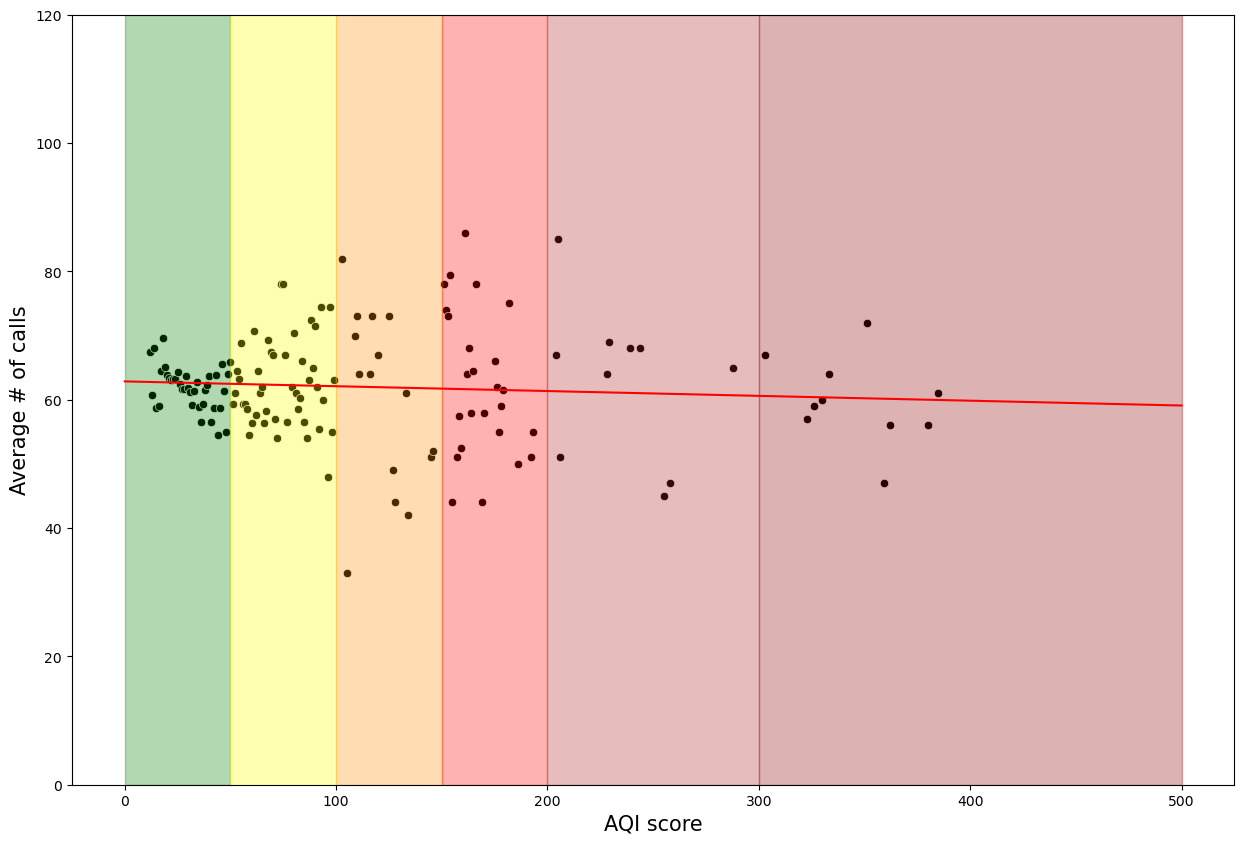

In [217]:

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
fit = lm.fit(final_aqi[['overall aqi']], final_aqi['# of calls'])
test_x = np.array(np.linspace(0, 500, 100)).reshape(-1, 1)
y_pred = fit.predict(test_x)

aqi_ranges = [0,50,100, 150, 200, 300, 500]
aqi_categories = ['good', 'moderate', 'unhealthy for sensitive groups', 'unhealthy', 'very unhealthy', 'hazardous']
aqi_colors = ['green', 'yellow', 'darkorange', 'red', 'firebrick', 'darkred']

print(np.corrcoef(final_aqi['overall aqi'], final_aqi['# of calls']))

fig, ax = plt.subplots(figsize = (15,10))
sns.scatterplot(final_aqi, x='overall aqi', y='# of calls', ax = ax, color = 'k')
sns.lineplot(x = test_x.flatten(), y=y_pred, ax = ax, color = 'r')
for i, k, c in zip(range(1,7), aqi_categories, aqi_colors):
        ax.axvspan(aqi_ranges[i-1], aqi_ranges[i], color = c, label = k , alpha=0.3)  
ax.set_ylabel('Average # of calls', fontsize = 15)
ax.set_xlabel('AQI score', fontsize = 15)
ax.set_ylim(0, 120)
plt.show()

#### All data

In [178]:
temp = pd.merge(aqi_data, sun, on = 'date', how = 'left')
all_merge = pd.merge(temp, eugene_weather, on = 'date', how='left')

# all_merge.to_csv('all_merge.csv')
all_merge.drop(labels = ['humidity_avg', 'humidity_min', 'wind_speed_avg', 'wind_speed_min', 'pressure_avg', 'pressure_min', 'Unnamed: 4', 'temp_avg'], axis = 1, inplace = True)

all_merge['week'] = week_col(all_merge)
# all_merge = all_merge.dropna(subset ='season')

all_merge


count = all_merge.groupby(['city', 'week', 'season']).count().reset_index().iloc[:,0:4]
count = count.rename(columns = {'date':'# calls'})
mean = all_merge.groupby(['city', 'week', 'season']).mean(numeric_only=True).reset_index()
count_and_mean = pd.merge(count, mean, how = 'left', on = ['city', 'week', 'season'])
count_and_mean

,city,week,season,# calls,hour and min,hour,overall aqi
0,eugene,1.0,winter,660,13.397333,12.912121,45.662121
1,eugene,2.0,winter,738,12.975745,12.516260,44.705962
2,eugene,3.0,winter,944,13.073167,12.588983,48.402542
3,eugene,4.0,winter,952,13.483834,13.027311,53.477941
4,eugene,5.0,winter,944,13.288824,12.818856,49.682203
...,...,...,...,...,...,...,...
109,springfield,49.0,fall,216,12.907917,12.425926,35.643519
110,springfield,50.0,fall,209,13.205359,12.727273,47.631579
111,springfield,51.0,fall,21,16.524762,16.000000,72.000000
112,springfield,51.0,winter,217,13.410645,12.940092,42.133641


In [180]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output = False).set_output(transform = 'pandas')
ohe_transform = ohe.fit_transform(count_and_mean[['city', 'season']])
ohe_transform = ohe_transform.rename(columns = {'day_night_False' : 'night', 'day_night_True':'day'})
count_and_mean = pd.concat([count_and_mean, ohe_transform], axis = 1)
count_and_mean
count_and_mean2 = count_and_mean
count_and_mean2.to_csv('count_and_mean2.csv')

total Spring calls = 16973
Spring : 29
total Summer calls = 17032
Summer : 21
total Fall calls = 12510
Fall : 15
total Winter calls = 15433
Winter : 1


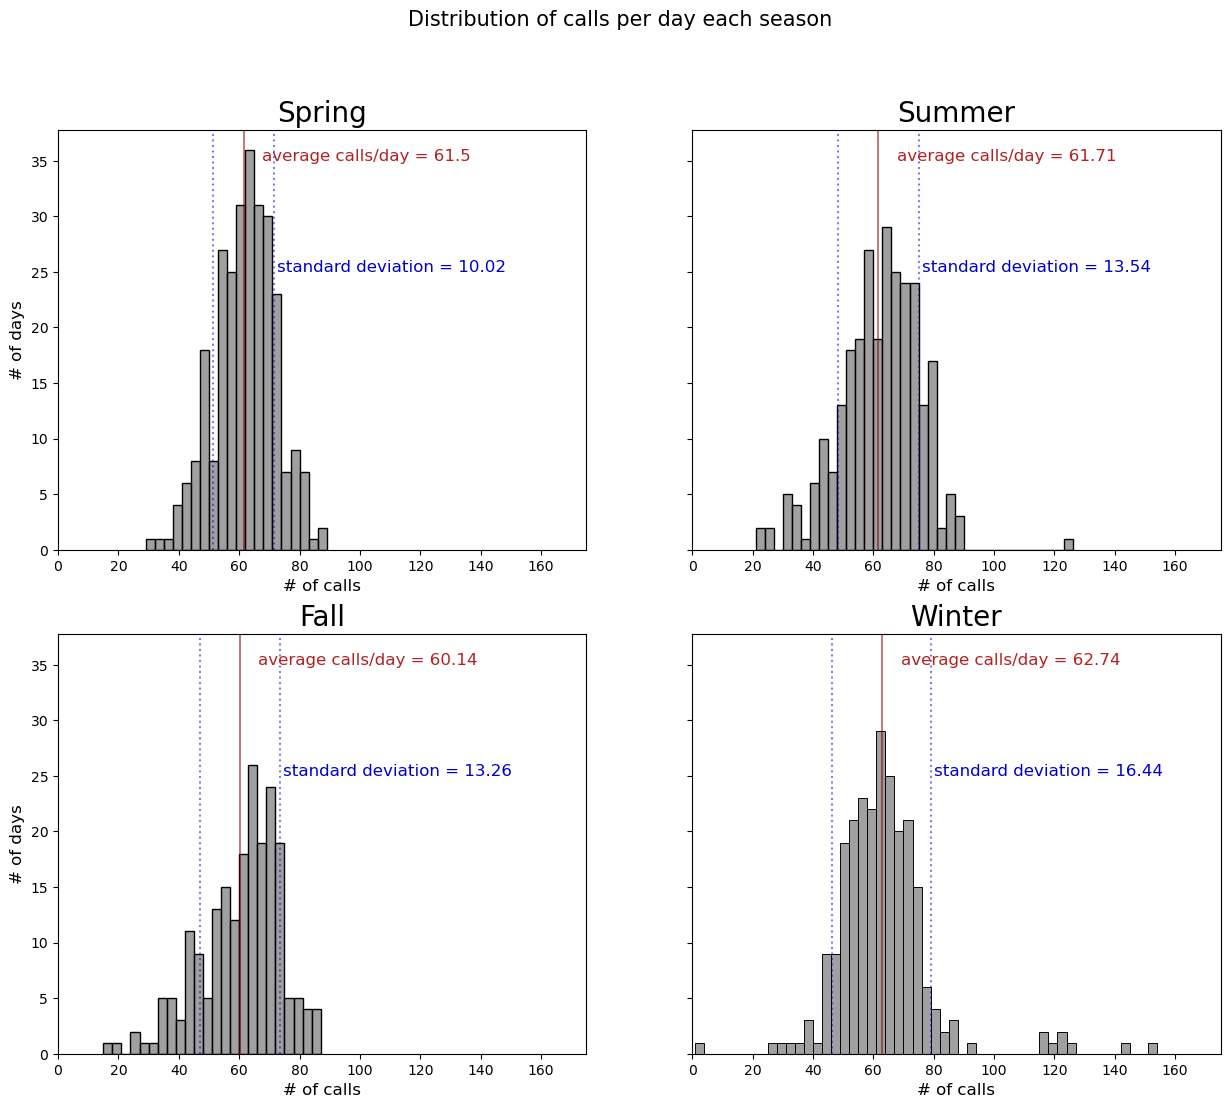

In [219]:
all_spring, all_summer, all_fall, all_winter = season_split(all_merge)
season_df = [all_spring, all_summer, all_fall, all_winter]
grouped_seasons=[]
for i in season_df:
    df = i.groupby(['date']).count().reset_index().rename(columns = {"time": "# of calls"})
    df['% of annual calls'] = (df['# of calls'] / np.sum(df['# of calls'])) * 100
    grouped_seasons.append(df)


for df, i in zip(grouped_seasons, seasons):
    num_calls = sum(df['# of calls'])
    desc = np.min(df['# of calls'])
    print (f'total {i} calls = {num_calls}')
    print (f'{i} : {desc}' )

seasons = ['Spring', 'Summer', 'Fall', 'Winter']
fig, ax = plt.subplots(2, 2, figsize = (15, 12), sharey=True)
fig.suptitle('Distribution of calls per day each season', fontsize = 15)

for i, j, k in zip(grouped_seasons, ax.flatten(), seasons):
    sns.histplot(i, x='# of calls', ax =j, bins = 40, binwidth=3, color = 'grey')
    mean = np.round(np.mean(i['# of calls']), 2)
    std = np.round(np.std(i['# of calls']), 2)
    j.axvline(mean, c='maroon', label = 'average calls/day', alpha = 0.5)
    j.text(mean * 1.1, 35, f'average calls/day = {mean}', c='firebrick', fontsize = 12)
    j.axvline(mean + std, color ='mediumblue', alpha = 0.5, linestyle =":")
    j.axvline(mean - std, color ='mediumblue', alpha = 0.5, linestyle =":")
    j.text(mean + std +1, 25, f'standard deviation = {std}', color ='mediumblue', fontsize = 12)
    # j.legend()
    j.set_ylabel('# of days', fontsize = 12)
    j.set_xlabel('# of calls', fontsize = 12)
    j.set_xlim(0,175)
    j.set_title(k, fontsize = 20)

plt.show()

In [182]:
#Running T tests
from scipy.stats import t
p_vals = []
n = len(grouped_seasons[0]['# of calls'])
for i in grouped_seasons[1::]:
    diff = grouped_seasons[0]['# of calls'] - i['# of calls']
    mu = 0
    mean = np.mean(diff)
    # print(mean)
    sd = np.std(diff)
    T = (mean - mu) / (sd/np.sqrt(n))
    #two sided test
    p_value = 2*(1-t.cdf(np.abs(T), df=n-1))
    # print(f'pval ={p_value}')
    p_vals = np.append(p_vals, p_value)
print(f'The p-value of Spring(Mean) vs Summer(Mean) is: {p_vals[0]}')
print(f'The p-value of Spring(Mean) vs Fall(Mean) is: {p_vals[1]}')
print(f'The p-value of Spring(Mean) vs Winter(Mean) is: {p_vals[2]}')

The p-value of Spring(Mean) vs Summer(Mean) is: 0.7997702916414506
The p-value of Spring(Mean) vs Fall(Mean) is: 0.00010764334675994469
The p-value of Spring(Mean) vs Winter(Mean) is: 0.8532787262574908


In [218]:
#running T test all vs all
# p_vals = []
n = len(grouped_seasons[0]['# of calls'])

for i, k  in zip(grouped_seasons, range(4)):
    for j, l in zip(grouped_seasons, range(4)):
        diff = i['# of calls'] - j['# of calls']
        mu = 0
        mean = np.mean(diff)
        # print(mean)
        sd = np.std(diff)
        T = (mean - mu) / (sd/np.sqrt(n))
        #two sided test
        p_value = 2*(1-t.cdf(np.abs(T), df=n-1))
        # print(f'pval ={p_value}')
        # p_vals = np.append(p_vals, p_value)
        print(f'The p-value of {seasons[k]} vs {seasons[l]} is: {p_value}')

The p-value of Spring vs Spring is: nan
The p-value of Spring vs Summer is: 0.7997702916414506
The p-value of Spring vs Fall is: 0.00010764334675994469
The p-value of Spring vs Winter is: 0.8532787262574908
The p-value of Summer vs Spring is: 0.7997702916414506
The p-value of Summer vs Summer is: nan
The p-value of Summer vs Fall is: 2.827094114365991e-10
The p-value of Summer vs Winter is: 0.19034594700642482
The p-value of Fall vs Spring is: 0.00010764334675994469
The p-value of Fall vs Summer is: 2.827094114365991e-10
The p-value of Fall vs Fall is: nan
The p-value of Fall vs Winter is: 0.002150004482041945
The p-value of Winter vs Spring is: 0.8532787262574908
The p-value of Winter vs Summer is: 0.19034594700642482
The p-value of Winter vs Fall is: 0.002150004482041945
The p-value of Winter vs Winter is: nan


In [184]:
#running ks test
from scipy.stats import kstest
ks_p_vals = []
n = len(grouped_seasons[0]['# of calls'])
for i in grouped_seasons[1::]:
    ks_p_value = kstest(grouped_seasons[0]['# of calls'], i['# of calls'])[1]
    ks_p_vals = np.append(ks_p_vals, ks_p_value)
print(f'The p-value of Spring vs Summer is: {ks_p_vals[0]}')
print(f'The p-value of Spring vs Fall is: {ks_p_vals[1]}')
print(f'The p-value of Spring vs Winter is: {ks_p_vals[2]}')

The p-value of Spring vs Summer is: 0.048869118148969916
The p-value of Spring vs Fall is: 0.198230884453017
The p-value of Spring vs Winter is: 0.7334051466736482


In [185]:
#Running KS Test all vs all


for i, k  in zip(grouped_seasons, range(4)):
    for j, l in zip(grouped_seasons, range(4)):
        ks_p_value = kstest(i['# of calls'], j['# of calls'])[1]
        print(f'The p-value of {seasons[k]} vs {seasons[l]} is: {ks_p_value}')

The p-value of Spring vs Spring is: 1.0
The p-value of Spring vs Summer is: 0.048869118148969916
The p-value of Spring vs Fall is: 0.198230884453017
The p-value of Spring vs Winter is: 0.7334051466736482
The p-value of Summer vs Spring is: 0.048869118148969916
The p-value of Summer vs Summer is: 1.0
The p-value of Summer vs Fall is: 0.3822677660627637
The p-value of Summer vs Winter is: 0.3675236209758887
The p-value of Fall vs Spring is: 0.198230884453017
The p-value of Fall vs Summer is: 0.3822677660627637
The p-value of Fall vs Fall is: 1.0
The p-value of Fall vs Winter is: 0.2512520958796357
The p-value of Winter vs Spring is: 0.7334051466736482
The p-value of Winter vs Summer is: 0.3675236209758887
The p-value of Winter vs Fall is: 0.2512520958796357
The p-value of Winter vs Winter is: 1.0
